https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\VICTUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install pandas

In [3]:
df = pd.read_csv('heart.csv')
#sat = pd.read_csv('o2Saturation.csv') 

In [4]:
df.shape

(303, 14)

In [5]:
# Check Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#describe the data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# univariete analysis
def conti_discr(df):
    num_conti_feaures = [feature for feature in df.columns if df[feature].nunique()>10]
    num_dicr_feaures = [feature for feature in df.columns if df[feature].nunique()<10]
    return num_conti_feaures,num_dicr_feaures
num_conti_feaures,num_dicr_feaures= conti_discr(df)

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

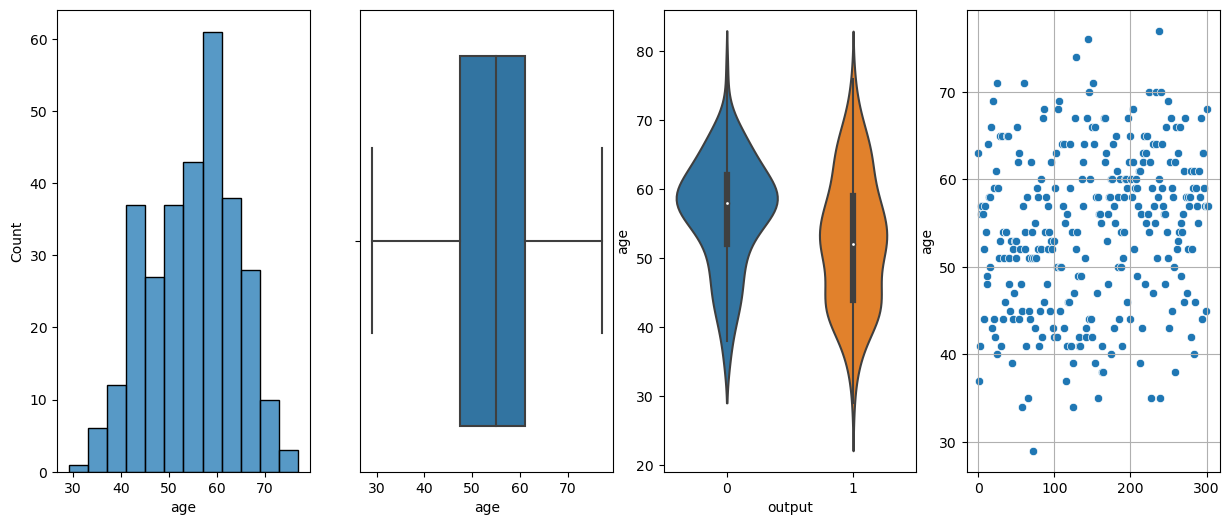

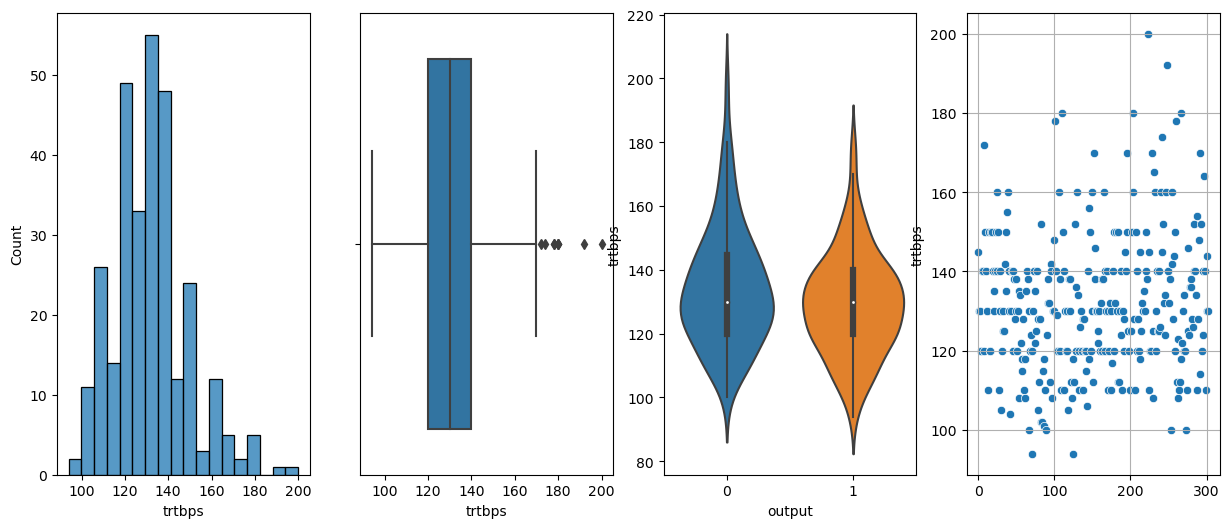

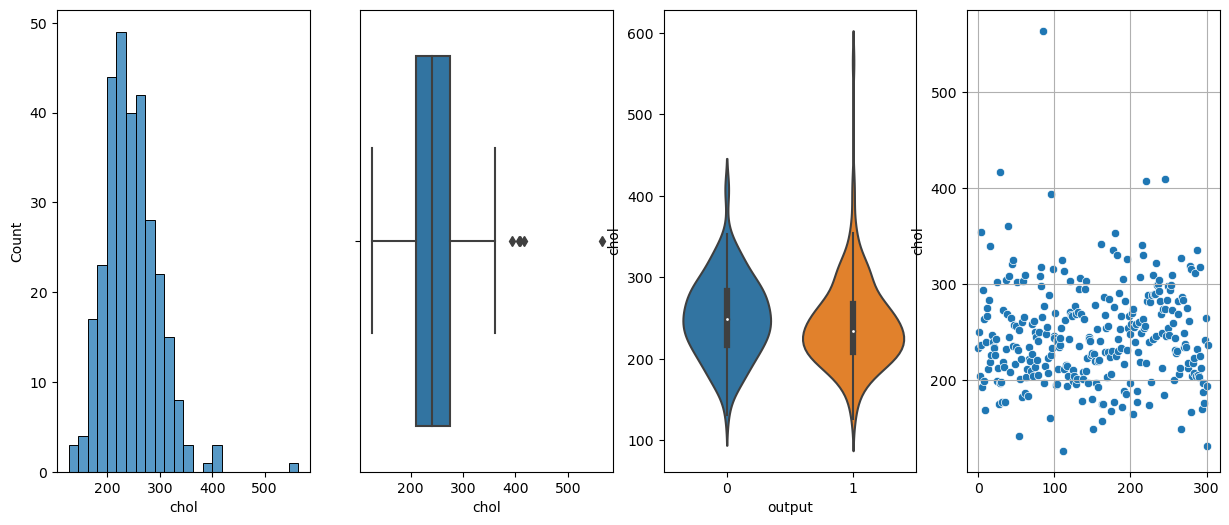

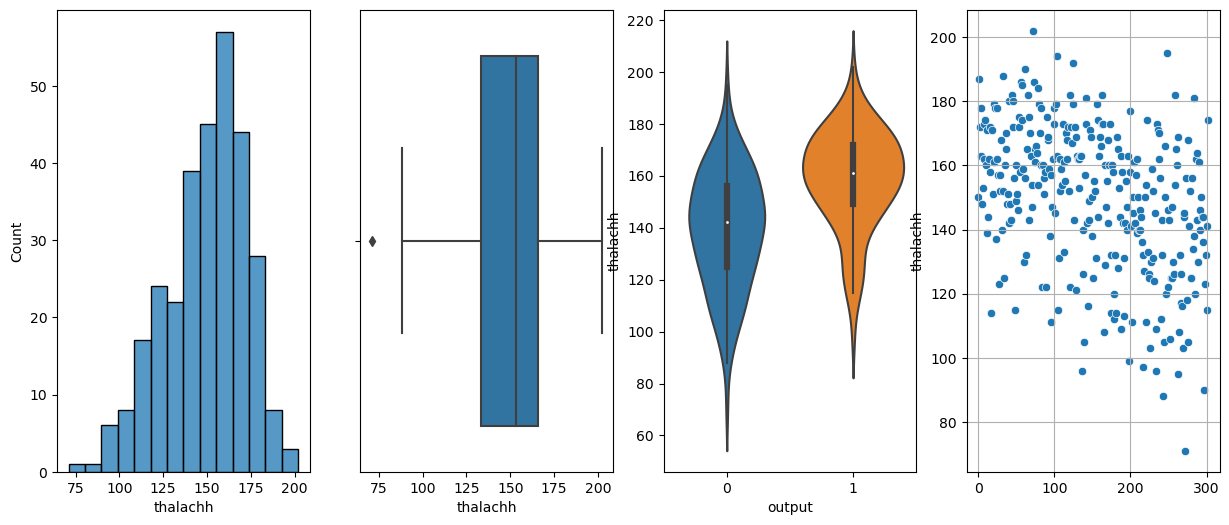

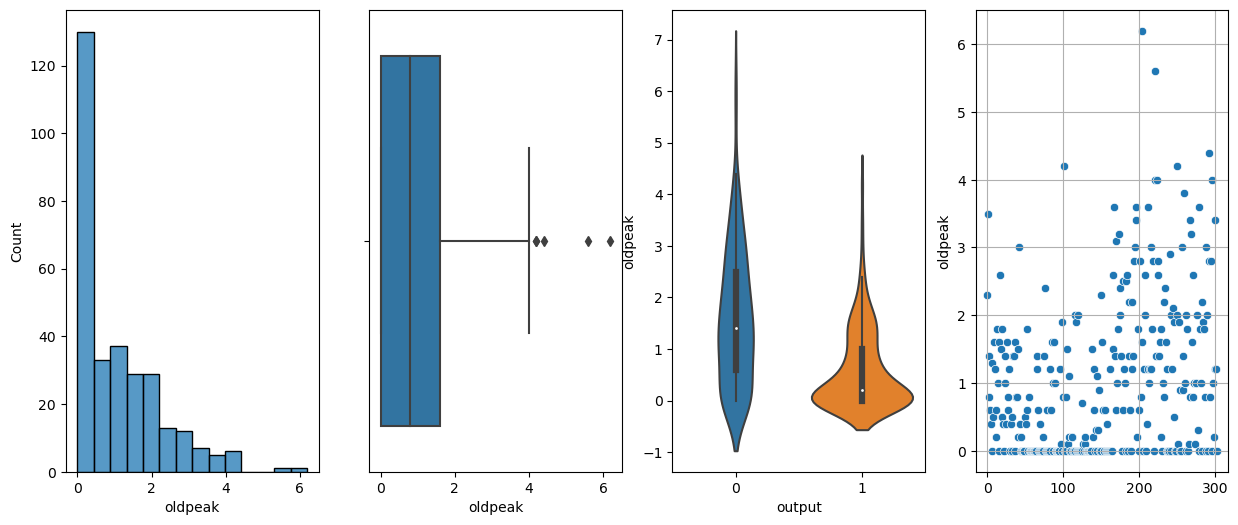

In [9]:
def visualize_columns(df,discrete_features=True,target='output'):
    
    num_conti_feaures, num_dicr_feaures = conti_discr(df)
  
    if discrete_features:
        for feature in num_conti_feaures:
            _,ax= plt.subplots(1,4,figsize=(15,6))
            
            sns.histplot(x=df[feature],ax=ax[0])
            sns.boxplot(x=df[feature],ax=ax[1])
            sns.violinplot(x=df[target],y=df[feature],ax=ax[2])
            sns.scatterplot(df[feature])
            plt.grid()
    else:
        for feature in num_dicr_feaures:
            _,ax=plt.subplots(1,3,figsize=(15,6))
            sns.countplot(x=df[feature],ax=ax[0])
            plt.grid()
            sns.violinplot(x=df[feature],y=df[target],ax=ax[1])
            plt.pie(df[feature].value_counts(),autopct="%1.1f%%")
        
visualize_columns(df,True)
    


In [10]:
#sns.pairplot(df)

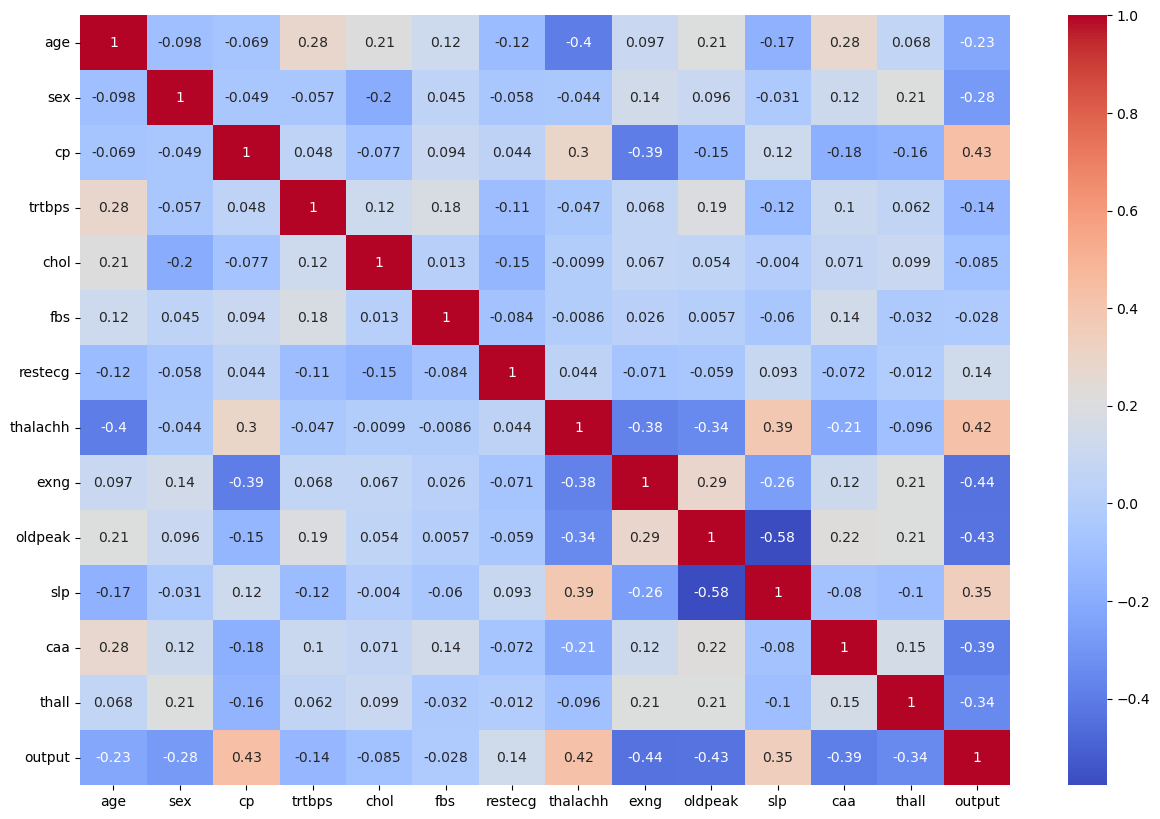

In [11]:
def correlation_matrix(df):
    plt.figure(figsize=(15,10))
    sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
correlation_matrix(df)

In [12]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
gender_perc = ((df.groupby('sex').mean()*100)['output']).reset_index()

In [14]:
heart_attack_gender = gender_perc.rename(columns={'output':'Percentage'}).replace({0:'female',1:"male"})

<Axes: >

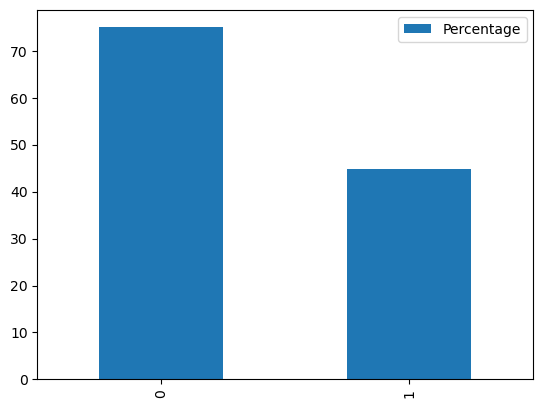

In [15]:
heart_attack_gender.plot(kind='bar',label=['female',"male"])

In [16]:
heart_attack_gender

,sex,Percentage
0,female,75.000000
1,male,44.927536


- 75 female have higer chance of risk
- 44 percentage of male have higher chance of risk

<Axes: xlabel='cp'>

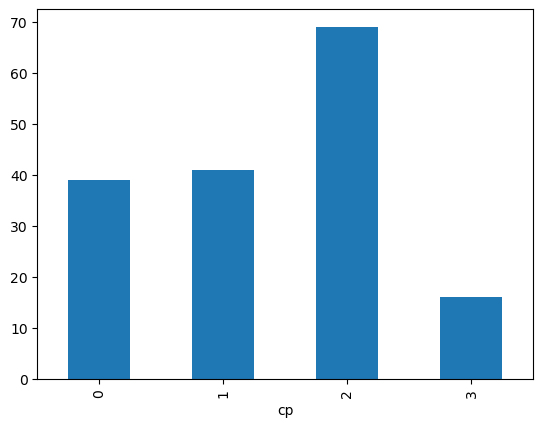

In [17]:
df.groupby('cp').sum()['output'].plot.bar()

- people who have cp = 2 havce higher chance of risk 

<Axes: xlabel='cp'>

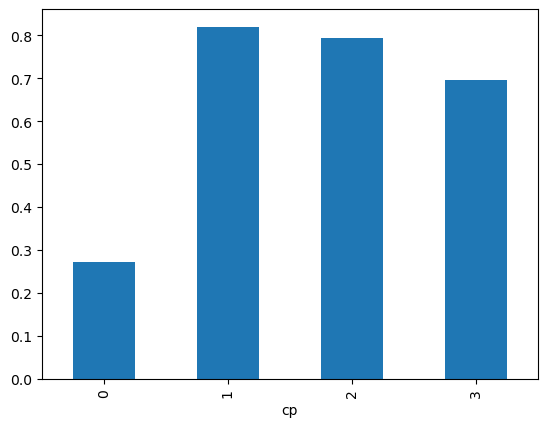

In [18]:
df.groupby('cp').mean()['output'].plot.bar()

- people who have high cp have higher chance of risk

<Axes: xlabel='cp', ylabel='output'>

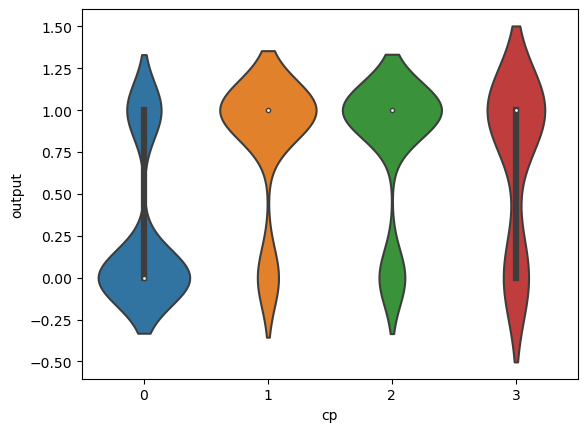

In [19]:
sns.violinplot(x=df['cp'],y=df['output'])

<Axes: xlabel='trtbps', ylabel='output'>

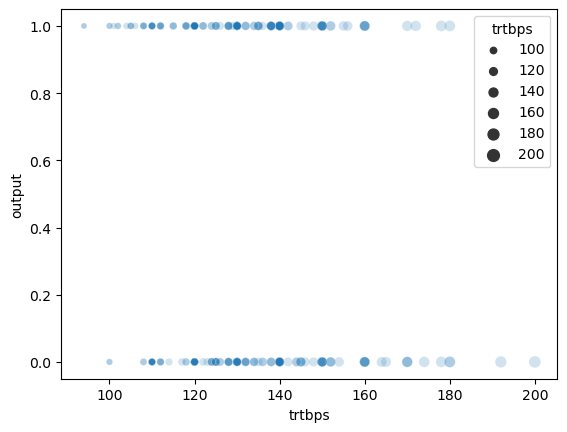

In [20]:
sns.scatterplot(data=df,x='trtbps',y="output",size='trtbps',alpha=.2)

In [21]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='age', ylabel='chol'>

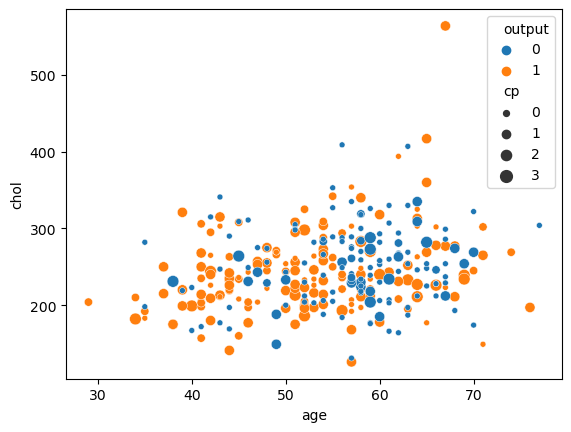

In [22]:
sns.scatterplot(data=df,x="age",y='chol',hue='output',size='cp')

In [23]:
df.groupby("fbs").count()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
fbs,,,,,,,,,,,,,
0,258,258,258,258,258,258,258,258,258,258,258,258,258
1,45,45,45,45,45,45,45,45,45,45,45,45,45


<Axes: xlabel='restecg'>

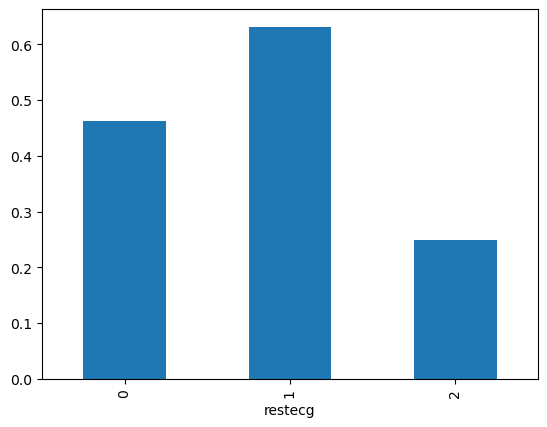

In [24]:
df.groupby("restecg").mean()['output'].plot.bar()

In [25]:
df.value_counts()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
38   1    2   138     175   0    1        173       0     0.0      2    4    2      1         2
59   1    0   110     239   0    0        142       1     1.2      1    1    3      0         1
          2   126     218   1    1        134       0     2.2      1    1    1      0         1
          1   140     221   0    1        164       1     0.0      2    0    2      1         1
          0   170     326   0    0        140       1     3.4      0    0    3      0         1
                                                                                             ..
51   1    2   94      227   0    1        154       1     0.0      2    1    3      1         1
          0   140     299   0    1        173       1     1.6      2    0    3      0         1
                      298   0    1        122       1     4.2      1    3    3      0         1
                      261   0    0        186

In [26]:
#!pip install skimpy

In [27]:
from skimpy import skim

In [28]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 303    │ │ int32       │ 13    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ age               │    0 │       0 │      54 │     9.1 │    29 │    48 │    55 │    61 │     77 │  ▁▃▅▇▅▁  │  │
│ │ sex               │    0 │       0 │    0.68 │    0.47 │     0 │     0 │     1 │     1 │      1 │  ▃    ▇  │  │
│ │ cp                │    0 │       0 │    0.97 │       1 │     0 │     0 │     1 │     2 │      3 │  ▇ ▃ ▅▁  │  │
│ │ trtbps            │    0 │       0 │     130 │      18 │    94 │   120 │   130 │   140 │    200 │  ▃▇▇▃▁   │  │
│ │ chol              │    0 │       0 │     250 │      52 │   130 │   210 │   240 │   270 │    560 │   ▂▇▃    │  │
│ │ fbs               │    0 │       0 │    0.15 │    0.36 │     0 │     0 │     0 │     0 │      1 │  ▇    ▁  │  │
│ │ restecg           │    0 │       0 │    0.53 │    0.53 │     0 │     0 │     1 │     1 │      2 │   ▇  ▇   │  │
│ │ thalachh          │    0 │       0 │     150 │      23 │    71 │   130 │   150 │   170 │    200 │   ▂▃▇▇▁  │  │
│ │ exng              │    0 │       0 │    0.33 │    0.47 │     0 │     0 │     0 │     1 │      1 │  ▇    ▃  │  │
│ │ oldpeak           │    0 │       0 │       1 │     1.2 │     0 │     0 │   0.8 │   1.6 │    6.2 │   ▇▃▁▁   │  │
│ │ slp               │    0 │       0 │     1.4 │    0.62 │     0 │     1 │     1 │     2 │      2 │  ▁  ▇ ▇  │  │
│ │ caa               │    0 │       0 │    0.73 │       1 │     0 │     0 │     0 │     1 │      4 │  ▇▃ ▂▁   │  │
│ │ thall             │    0 │       0 │     2.3 │    0.61 │     0 │     2 │     2 │     3 │      3 │    ▁ ▇▆  │  │
│ │ output            │    0 │       0 │    0.54 │     0.5 │     0 │     0 │     1 │     1 │      1 │  ▇    ▇  │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [29]:
df[df['restecg']==2]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [30]:
from scipy.stats import zscore

In [31]:
z_score = zscore(df)

In [32]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

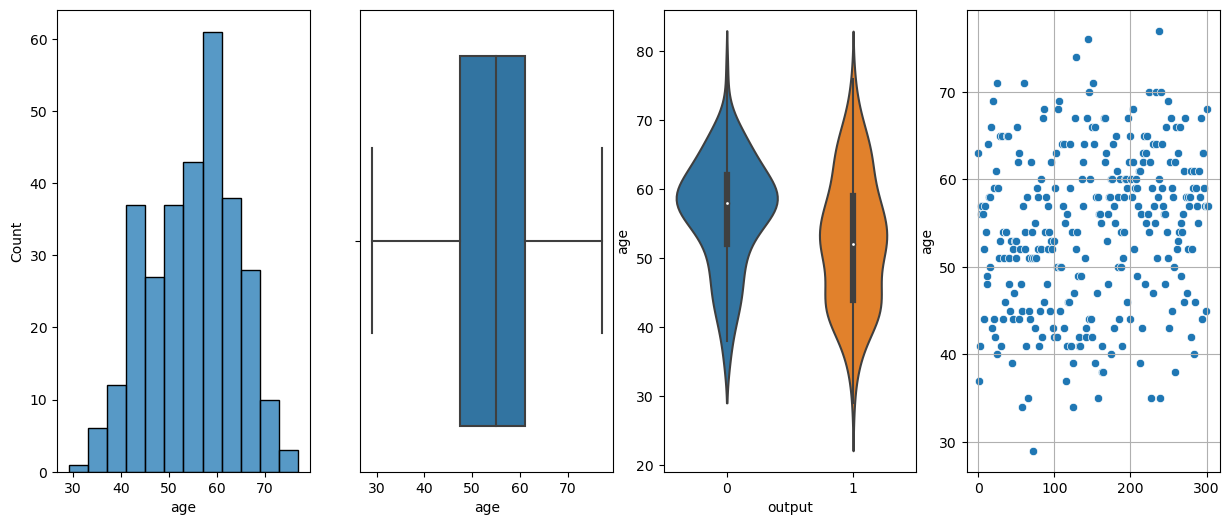

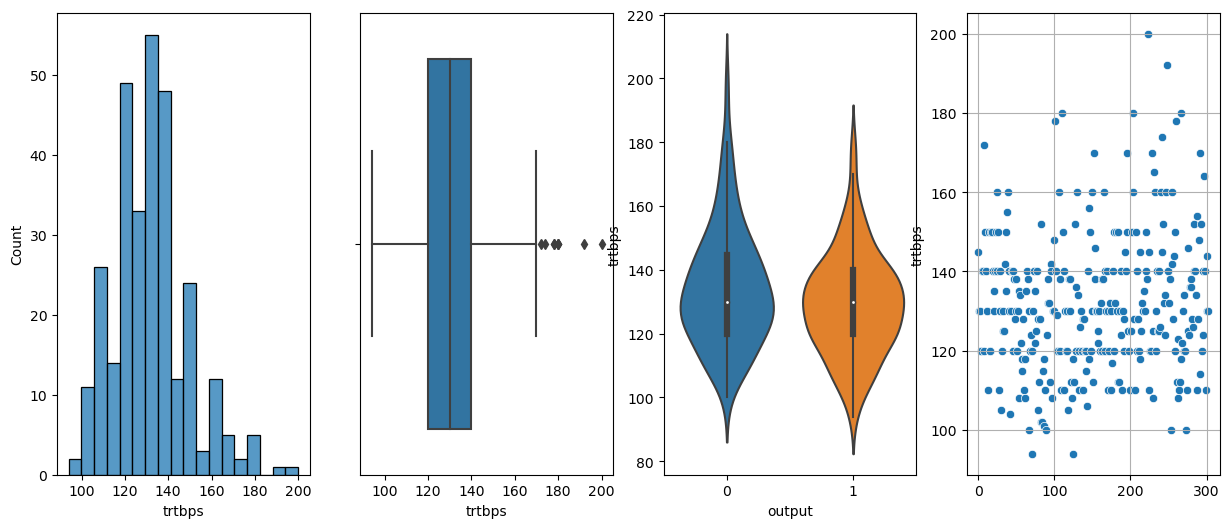

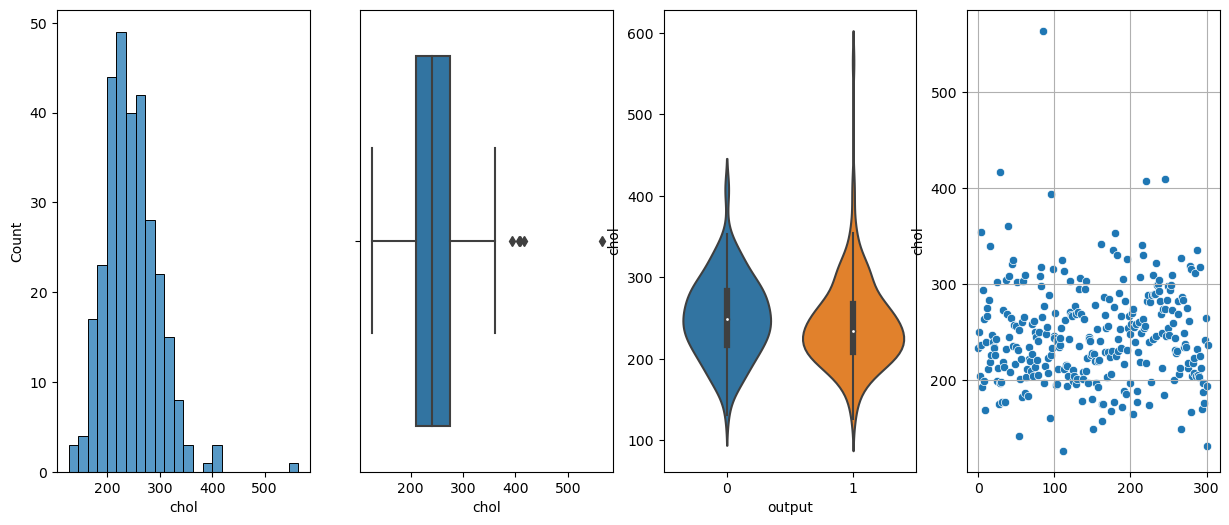

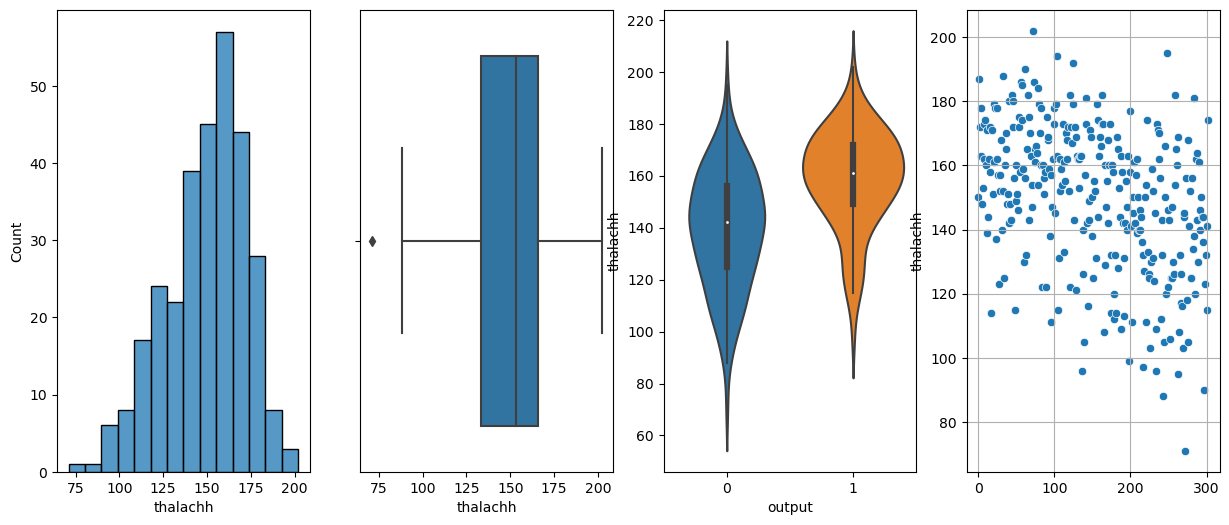

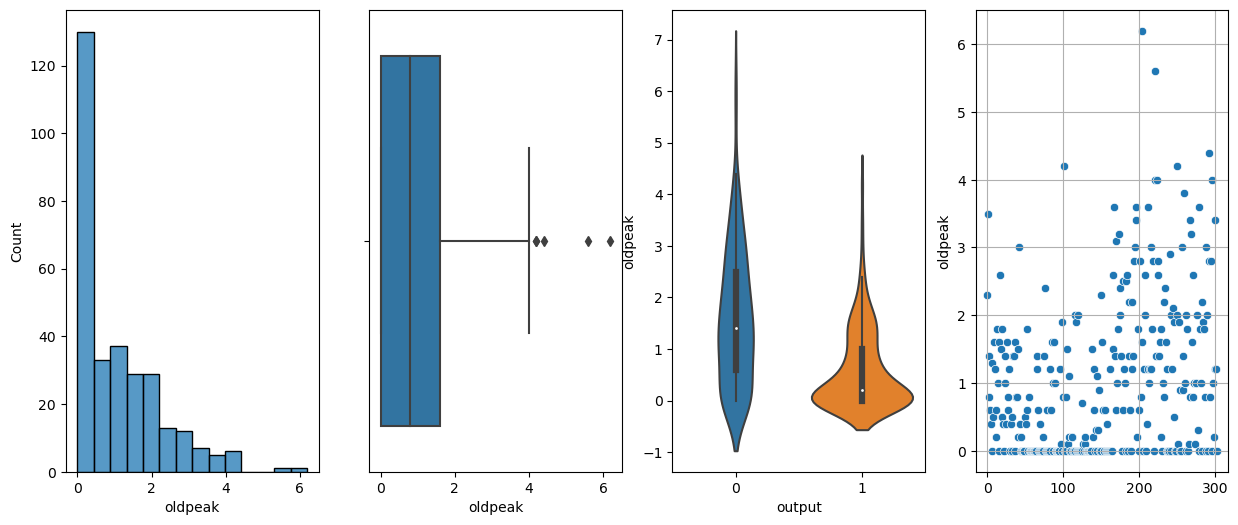

In [33]:
visualize_columns(df,num_dicr_feaures)

In [34]:
df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [35]:
df.groupby('exng').mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall,output
exng,,,,,,,,,,,,,
0,53.754902,0.637255,1.250000,130.799020,243.848039,0.142157,0.553922,155.681373,0.806863,1.509804,0.647059,2.225490,0.696078
1,55.626263,0.777778,0.383838,133.323232,251.242424,0.161616,0.474747,137.212121,1.519192,1.171717,0.898990,2.494949,0.232323


In [36]:
142+23

165

In [37]:
df['slp'].value_counts()

slp
2    142
1    140
0     21
Name: count, dtype: int64

In [38]:
df.groupby('slp').mean()['output']

slp
0    0.428571
1    0.350000
2    0.753521
Name: output, dtype: float64

In [39]:
df.columns = [column.upper() for column in df.columns] 

In [40]:
df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
caa = df.groupby('CAA')

In [42]:
caa.count()

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,THALL,OUTPUT
CAA,,,,,,,,,,,,,
0,175,175,175,175,175,175,175,175,175,175,175,175,175
1,65,65,65,65,65,65,65,65,65,65,65,65,65
2,38,38,38,38,38,38,38,38,38,38,38,38,38
3,20,20,20,20,20,20,20,20,20,20,20,20,20
4,5,5,5,5,5,5,5,5,5,5,5,5,5


In [43]:
caa.sum()

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,THALL,OUTPUT
CAA,,,,,,,,,,,,,
0,9038,111,199,22890,42472,20,100,27123,44,146.4,251,389,130
1,3736,50,57,8426,16128,9,31,9171,30,65.9,91,158,21
2,2272,25,19,5157,9669,10,17,5556,17,64.9,51,92,7
3,1198,16,11,2738,5309,5,8,2691,7,37.3,23,50,3
4,229,5,7,671,1040,1,4,802,1,0.5,8,12,4


In [44]:
#df.merge()

# 
- age feature is distributed well without any outliers , people who have heart attack are mainly int the range of 40 to 60
- trops , it contain some outliers but not seeing any correlation with target variable
- cholestrol contain a big outlier there is a samll positive correlation between thm
-  fbs - fasting blood sugar didnt seem much effect on the outcome
- restecg ,0 and 1 have chances of heart attacks where 1 have 65% and 0 have 45%
- chest pain type 0 has lowwer chance while 1,2,3 have higher chance with  is more 
- thalach is showing a gd positive relation ship with target variable 42%
- exng have higher nagative correlation with taget variable
- slp ,people who have slp 2 have higher chance like 75% people who have slop = 2 have high Risk
- 

In [45]:
def grpby_with_target(groupby_object,target_feature='OUTPUT'):
    
    """THE FUNCTION WILL RETURN SUM ,COUNT AND MEAN OF THE DATA IN GROUPBY OBJECT WISE"""
    #CRAETE 3 DATAFRAME WITH 3 ATTRIBUTE SUM,COUNT,MEAN
    target_sum = groupby_object.sum()[target_feature].reset_index().rename(columns={"OUTPUT":'SUM'})
    target_count = groupby_object.count()[target_feature].reset_index().rename(columns={target_feature:'COUNT'})
    target_mean = groupby_object.mean()[target_feature].reset_index().rename(columns={target_feature:'MEAN'})
    
    #MERGE THE DATA
    count_sum_merged = target_count.merge(target_sum,on=target_count.columns[0],how="inner")
    final_df = count_sum_merged.merge(target_mean,on=target_count.columns[0],how='inner')
    
    return final_df

In [46]:
df.columns = [column.upper() for column in df.columns]

In [47]:
grpby_with_target(caa,'OUTPUT')

,CAA,COUNT,SUM,MEAN
0,0,175,130,0.742857
1,1,65,21,0.323077
2,2,38,7,0.184211
3,3,20,3,0.150000
4,4,5,4,0.800000


In [48]:
grpby_with_target(df.groupby('SEX'),"OUTPUT")

,SEX,COUNT,SUM,MEAN
0,0,96,72,0.750000
1,1,207,93,0.449275


In [49]:
caa.sum()["OUTPUT"].reset_index()

,CAA,OUTPUT
0,0,130
1,1,21
2,2,7
3,3,3
4,4,4


In [50]:
grpby_with_target(df.groupby("RESTECG"))

,RESTECG,COUNT,SUM,MEAN
0,0,147,68,0.462585
1,1,152,96,0.631579
2,2,4,1,0.250000


In [51]:
grpby_with_target(df.groupby("EXNG"))

,EXNG,COUNT,SUM,MEAN
0,0,204,142,0.696078
1,1,99,23,0.232323


In [52]:
grpby_with_target(df.groupby('SLP'))

,SLP,COUNT,SUM,MEAN
0,0,21,9,0.428571
1,1,140,49,0.350000
2,2,142,107,0.753521


In [53]:
df_grpby = df.groupby

In [54]:
grpby_with_target(df_grpby('THALL'))

,THALL,COUNT,SUM,MEAN
0,0,2,1,0.500000
1,1,18,6,0.333333
2,2,166,130,0.783133
3,3,117,28,0.239316


In [55]:
df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
grpby_with_target(df_grpby('CP'))

,CP,COUNT,SUM,MEAN
0,0,143,39,0.272727
1,1,50,41,0.820000
2,2,87,69,0.793103
3,3,23,16,0.695652


In [57]:
# Feature Engineering

In [58]:
df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [59]:
n = df['THALACHH']*(df['SLP']+1)

<Axes: xlabel='OUTPUT'>

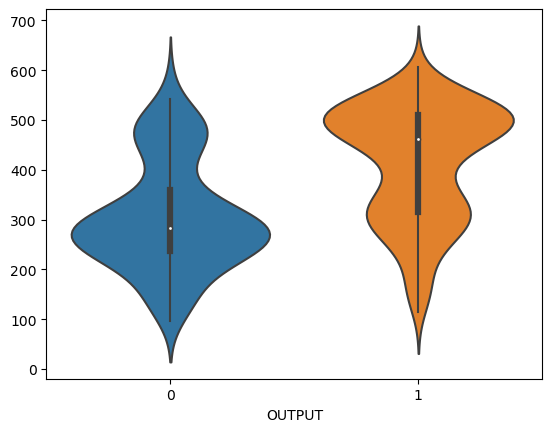

In [60]:
sns.violinplot(y=n,x=df['OUTPUT'])

In [61]:
f_df = df.copy()

In [62]:
f_df['tha_slp'] = n

In [63]:
f_df.corr()['OUTPUT']['tha_slp']

0.43169117737519475

In [64]:
f_df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT,tha_slp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,150
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,187
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,516
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,534
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,246
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,264
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,282
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,230


In [65]:
df['FBS'].nunique()
df['RESTECG'].nunique()

3

In [66]:
df.groupby(['FBS','RESTECG']).count()

AGE  SEX   CP  TRTBPS  CHOL  THALACHH  EXNG  OLDPEAK  SLP  CAA  \
FBS RESTECG                                                                   
0   0        121  121  121     121   121       121   121      121  121  121   
    1        133  133  133     133   133       133   133      133  133  133   
    2          4    4    4       4     4         4     4        4    4    4   
1   0         26   26   26      26    26        26    26       26   26   26   
    1         19   19   19      19    19        19    19       19   19   19   

             THALL  OUTPUT  
FBS RESTECG                 
0   0          121     121  
    1          133     133  
    2            4       4  
1   0           26      26  
    1           19      19

In [67]:
df.groupby(['FBS','RESTECG']).sum()

AGE  SEX   CP  TRTBPS   CHOL  THALACHH  EXNG  OLDPEAK  SLP  CAA  \
FBS RESTECG                                                                     
0   0        6690   85  102   16010  30661     17983    42    139.4  163   90   
    1        6974   88  135   17052  31754     20144    39    117.2  199   79   
    2         244    1    2     562   1047       503     2     10.9    3    4   
1   0        1496   18   31    3692   6845      3759    12     31.0   31   30   
    1        1069   15   23    2566   4311      2954     4     16.5   28   18   

             THALL  OUTPUT  
FBS RESTECG                 
0   0          283      57  
    1          308      84  
    2            8       1  
1   0           57      11  
    1           45      12

In [68]:
df.groupby(['FBS','RESTECG']).mean()

AGE       SEX        CP      TRTBPS        CHOL  \
FBS RESTECG                                                          
0   0        55.289256  0.702479  0.842975  132.314050  253.396694   
    1        52.436090  0.661654  1.015038  128.210526  238.751880   
    2        61.000000  0.250000  0.500000  140.500000  261.750000   
1   0        57.538462  0.692308  1.192308  142.000000  263.269231   
    1        56.263158  0.789474  1.210526  135.052632  226.894737   

               THALACHH      EXNG   OLDPEAK       SLP       CAA     THALL  \
FBS RESTECG                                                                 
0   0        148.619835  0.347107  1.152066  1.347107  0.743802  2.338843   
    1        151.458647  0.293233  0.881203  1.496241  0.593985  2.315789   
    2        125.750000  0.500000  2.725000  0.750000  1.000000  2.000000   
1   0        144.576923  0.461538  1.192308  1.192308  1.153846  2.192308   
    1        155.473684  0.210526  0.868421  1.473684  0.947368  2.368421   

               OUTPUT  
FBS RESTECG            
0   0        0.471074  
    1        0.631579  
    2        0.250000  
1   0        0.423077  
    1        0.631579

In [69]:
multi_data = df.groupby(["SLP",'CAA'])

In [70]:
multi_data.mean()

AGE       SEX        CP      TRTBPS        CHOL       FBS  \
SLP CAA                                                                    
0   0    53.800000  0.866667  1.266667  138.000000  228.933333  0.333333   
    1    59.000000  1.000000  1.000000  122.500000  259.500000  0.000000   
    2    59.000000  0.000000  0.000000  170.000000  278.000000  0.500000   
    3    60.000000  0.500000  0.000000  137.000000  241.000000  0.000000   
1   0    53.072464  0.550725  1.072464  130.014493  242.565217  0.086957   
    1    58.114286  0.857143  0.742857  130.371429  246.657143  0.142857   
    2    60.619048  0.714286  0.142857  135.714286  260.714286  0.238095   
    3    60.307692  0.769231  0.538462  142.538462  274.230769  0.153846   
    4    50.500000  1.000000  0.500000  128.500000  233.500000  0.500000   
2   0    50.208791  0.659341  1.164835  130.208791  245.065934  0.098901   
    1    56.571429  0.642857  1.035714  129.214286  249.142857  0.142857   
    2    58.733333  0.666667  1.066667  131.133333  242.533333  0.266667   
    3    58.800000  1.000000  0.800000  122.200000  252.400000  0.600000   
    4    42.666667  1.000000  2.000000  138.000000  191.000000  0.000000   

          RESTECG    THALACHH      EXNG   OLDPEAK     THALL    OUTPUT  
SLP CAA                                                                
0   0    0.533333  147.800000  0.466667  2.406667  2.400000  0.533333  
    1    0.000000  124.000000  0.500000  1.350000  2.000000  0.500000  
    2    0.000000  146.500000  0.500000  3.800000  2.500000  0.000000  
    3    1.000000  142.500000  0.000000  5.300000  2.000000  0.000000  
1   0    0.521739  147.014493  0.362319  1.168116  2.246377  0.608696  
    1    0.457143  130.457143  0.571429  1.482857  2.514286  0.114286  
    2    0.428571  135.142857  0.619048  2.047619  2.476190  0.047619  
    3    0.384615  128.153846  0.384615  1.846154  2.615385  0.076923  
    4    0.500000  143.500000  0.500000  0.250000  3.000000  0.500000  
2   0    0.615385  162.219780  0.131868  0.326374  2.175824  0.879121  
    1    0.535714  155.607143  0.321429  0.403571  2.357143  0.571429  
    2    0.533333  161.666667  0.200000  0.953333  2.333333  0.400000  
    3    0.200000  148.000000  0.400000  0.540000  2.400000  0.400000  
    4    1.000000  171.666667  0.000000  0.000000  2.000000  1.000000

In [71]:
multi_data.count()

AGE  SEX  CP  TRTBPS  CHOL  FBS  RESTECG  THALACHH  EXNG  OLDPEAK  \
SLP CAA                                                                      
0   0     15   15  15      15    15   15       15        15    15       15   
    1      2    2   2       2     2    2        2         2     2        2   
    2      2    2   2       2     2    2        2         2     2        2   
    3      2    2   2       2     2    2        2         2     2        2   
1   0     69   69  69      69    69   69       69        69    69       69   
    1     35   35  35      35    35   35       35        35    35       35   
    2     21   21  21      21    21   21       21        21    21       21   
    3     13   13  13      13    13   13       13        13    13       13   
    4      2    2   2       2     2    2        2         2     2        2   
2   0     91   91  91      91    91   91       91        91    91       91   
    1     28   28  28      28    28   28       28        28    28       28   
    2     15   15  15      15    15   15       15        15    15       15   
    3      5    5   5       5     5    5        5         5     5        5   
    4      3    3   3       3     3    3        3         3     3        3   

         THALL  OUTPUT  
SLP CAA                 
0   0       15      15  
    1        2       2  
    2        2       2  
    3        2       2  
1   0       69      69  
    1       35      35  
    2       21      21  
    3       13      13  
    4        2       2  
2   0       91      91  
    1       28      28  
    2       15      15  
    3        5       5  
    4        3       3

In [72]:

df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [73]:
f_df['age_per_caa'] = f_df['AGE']/(f_df['CAA']+1)

In [74]:
f_df.corr()['OUTPUT']['age_per_caa']

0.39078664126711393

In [75]:
fdf_conti,fdf_discr = conti_discr(f_df)

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

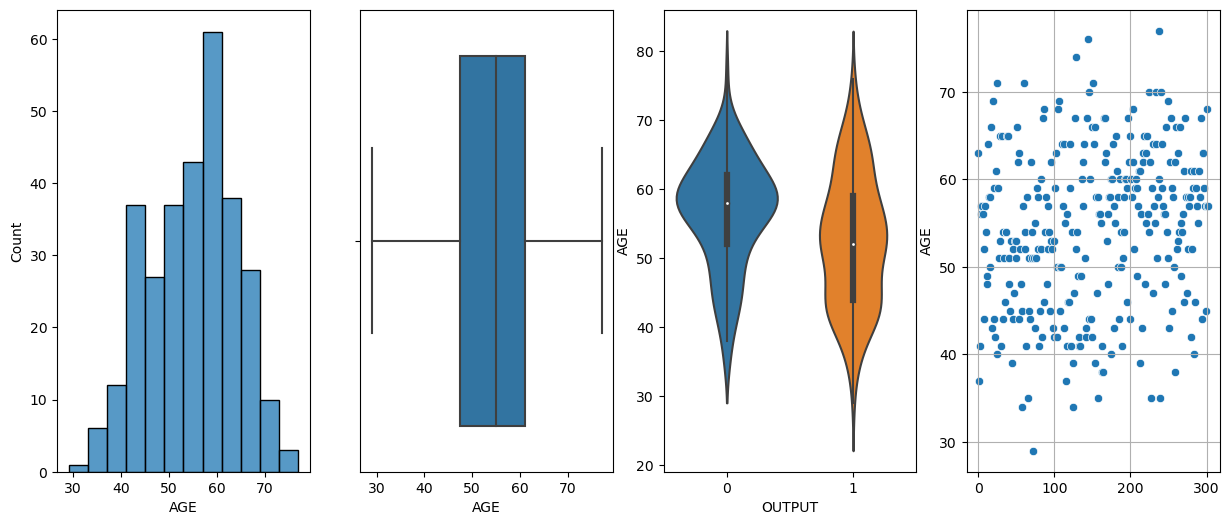

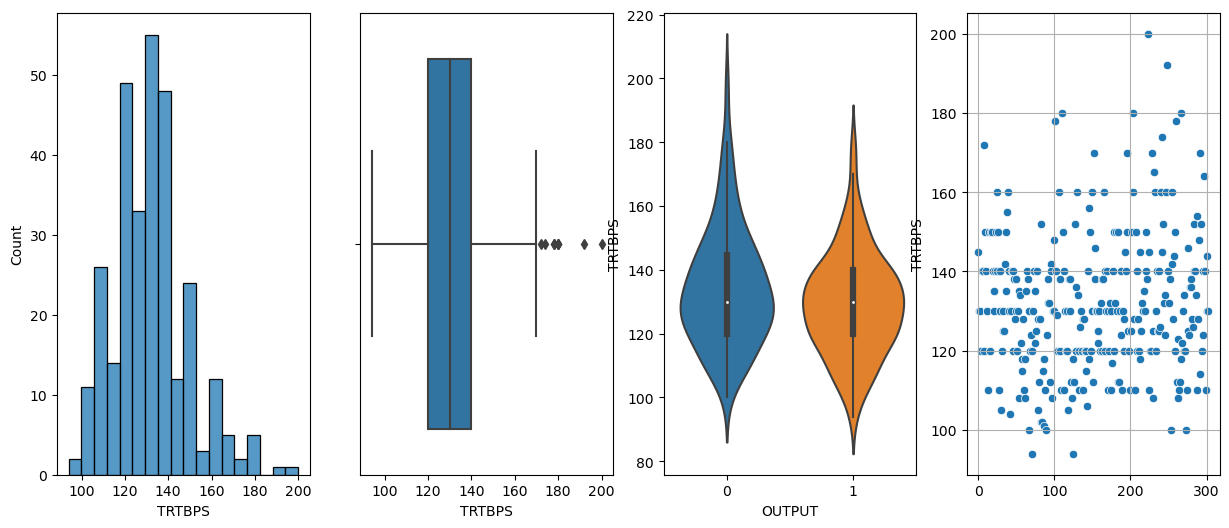

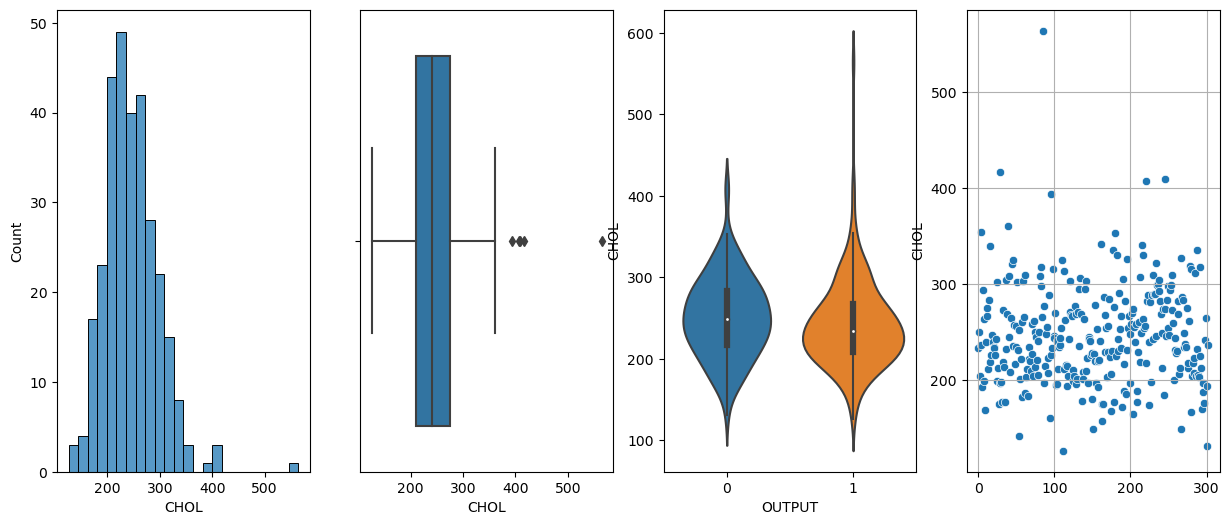

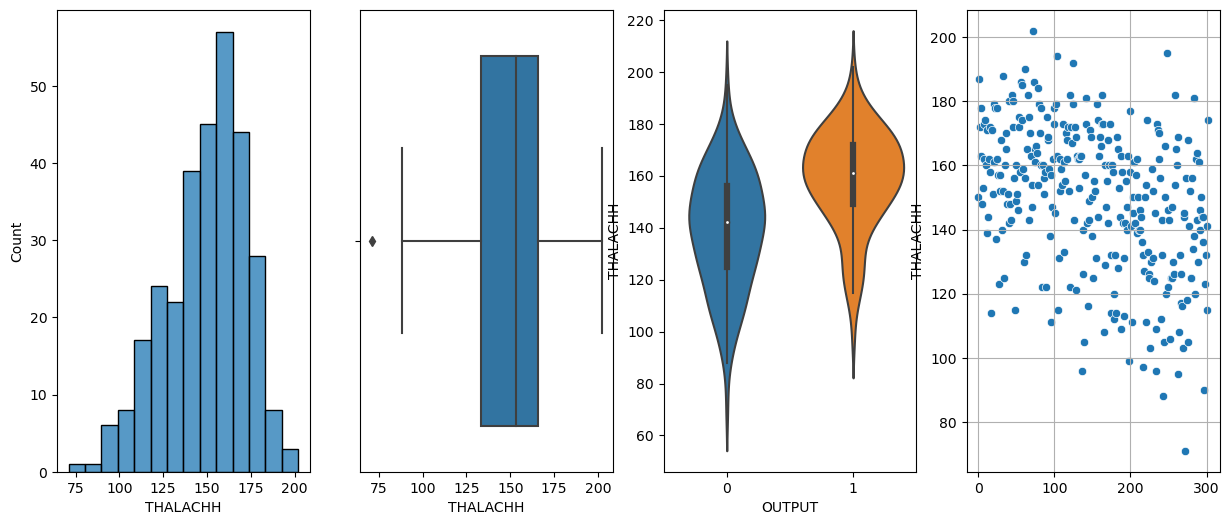

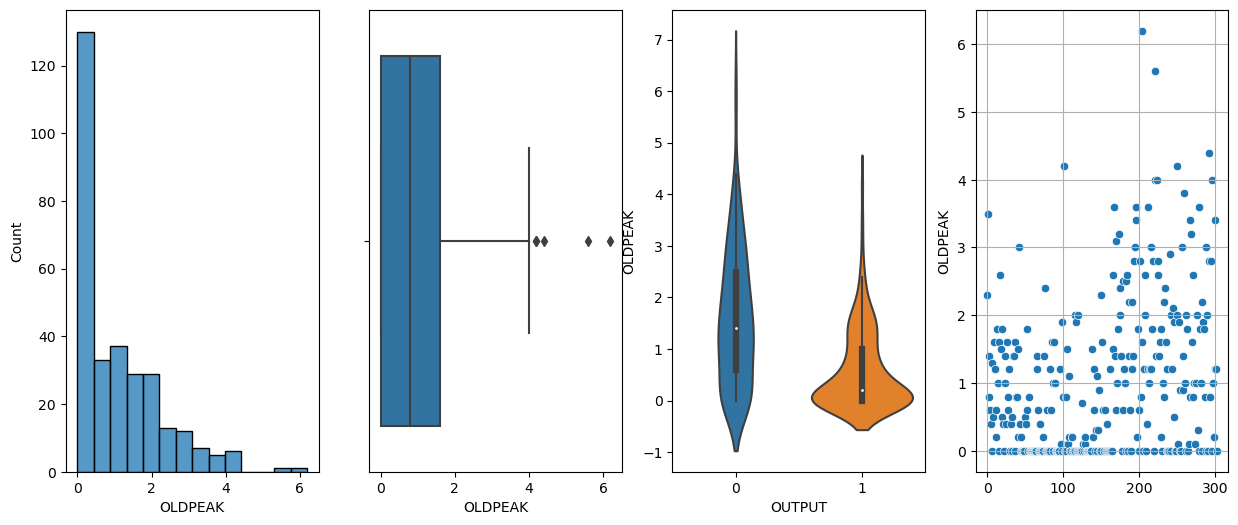

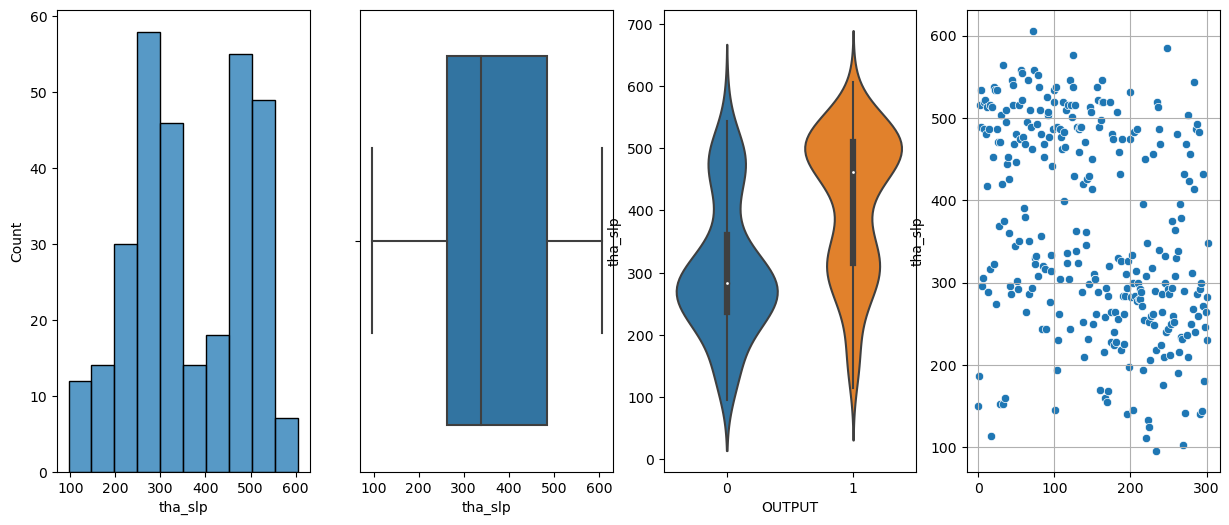

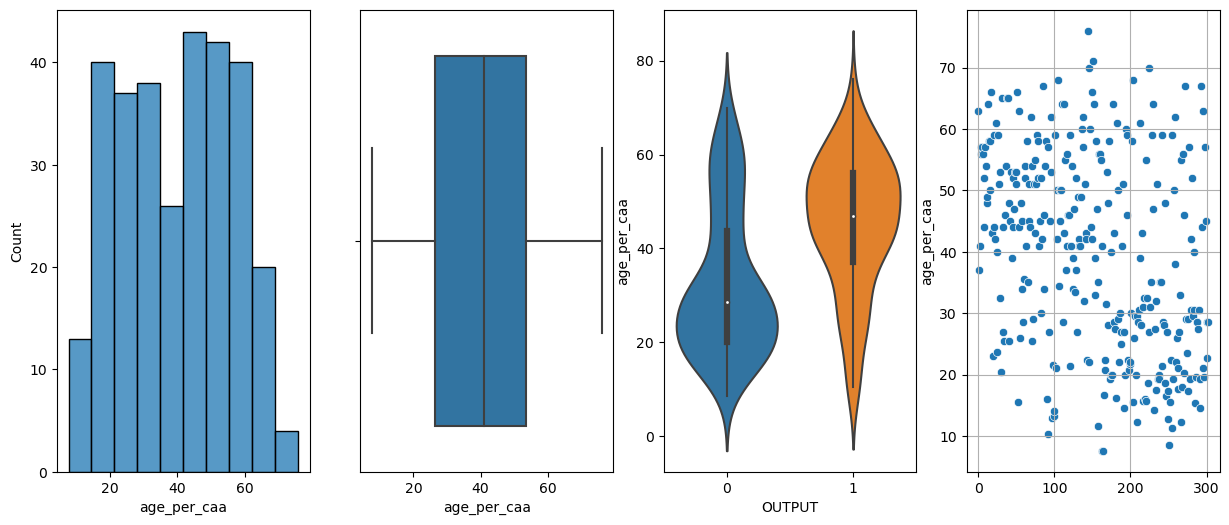

In [76]:
visualize_columns(f_df,fdf_conti,target="OUTPUT")

In [77]:
#visualize_columns(f_df,fdf_discr)

In [78]:
f_df.corr()['OUTPUT']['age_per_caa']

0.39078664126711393

In [79]:
df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [80]:
f_df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT,tha_slp,age_per_caa
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,150,63.000000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,187,37.000000
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,516,41.000000
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,534,56.000000
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,489,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,246,57.000000
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,264,45.000000
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,282,22.666667
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,230,28.500000


In [81]:
f_df['age_per_trtbps'] = f_df['AGE']/(f_df['TRTBPS']+1)

In [82]:
f_df.corr()['OUTPUT']['age_per_caa']

0.39078664126711393

In [83]:
f_df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT,tha_slp,age_per_caa,age_per_trtbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,150,63.000000,0.431507
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,187,37.000000,0.282443
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,516,41.000000,0.312977
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,534,56.000000,0.462810
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,489,57.000000,0.471074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,246,57.000000,0.404255
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,264,45.000000,0.405405
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,282,22.666667,0.468966
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,230,28.500000,0.435115


C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

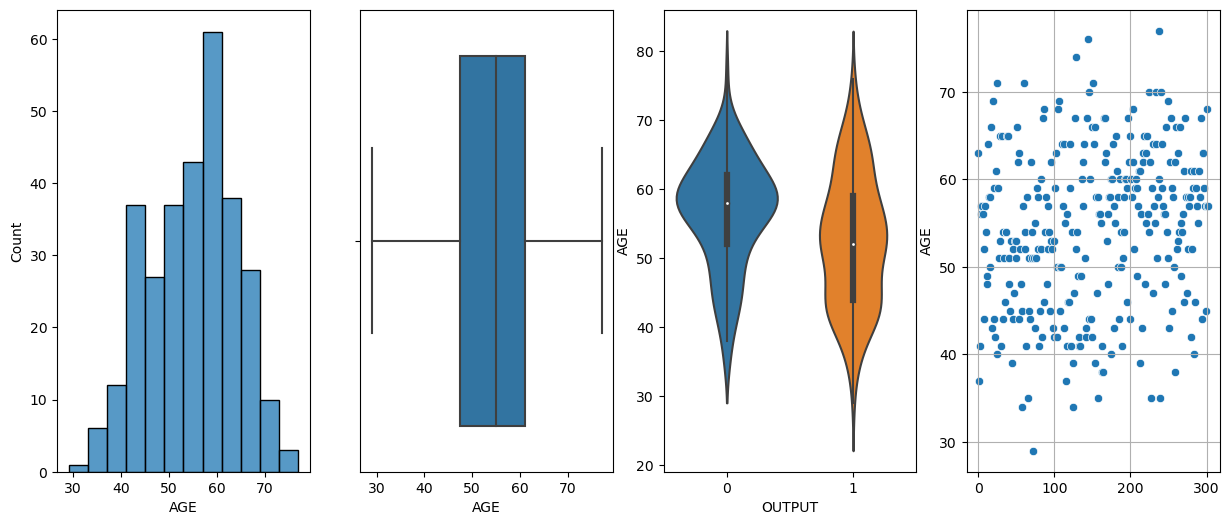

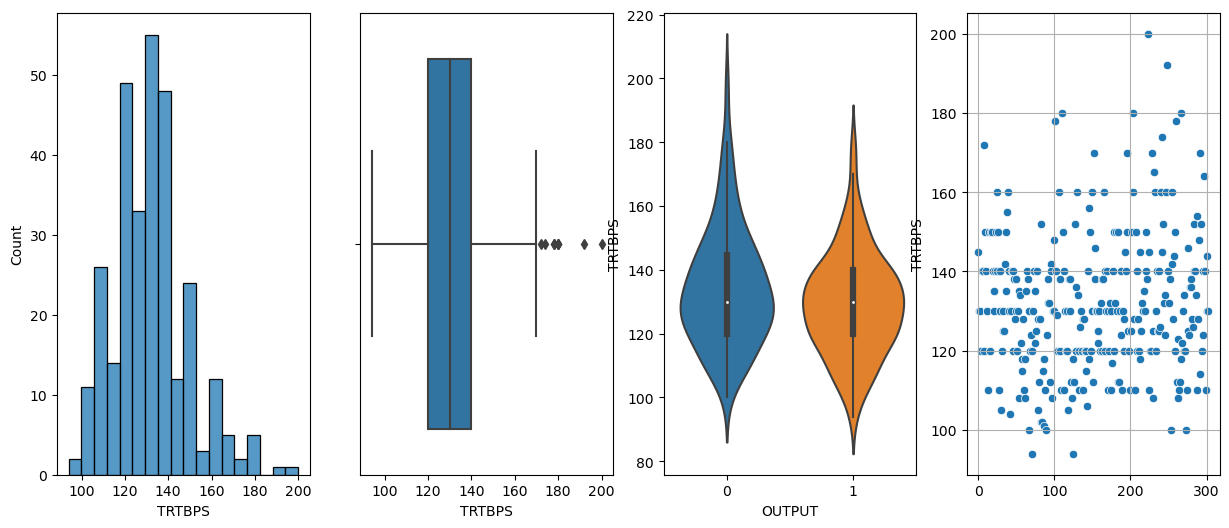

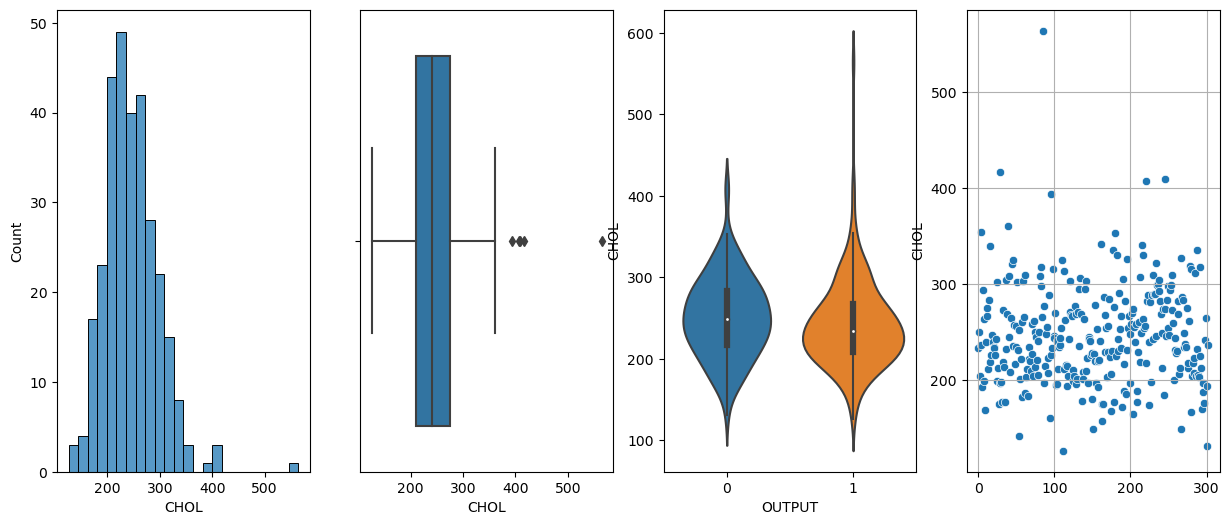

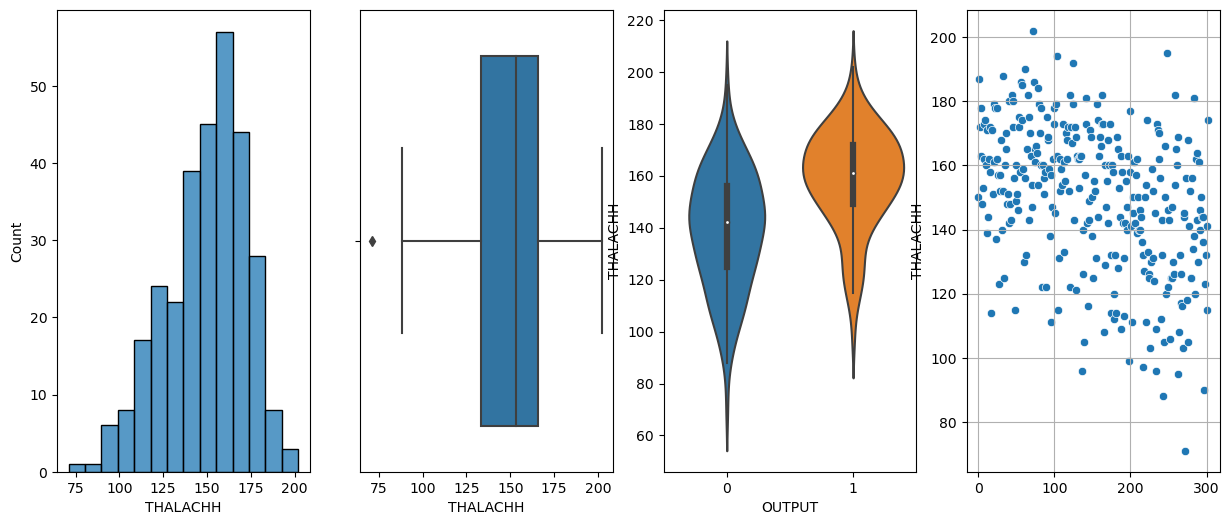

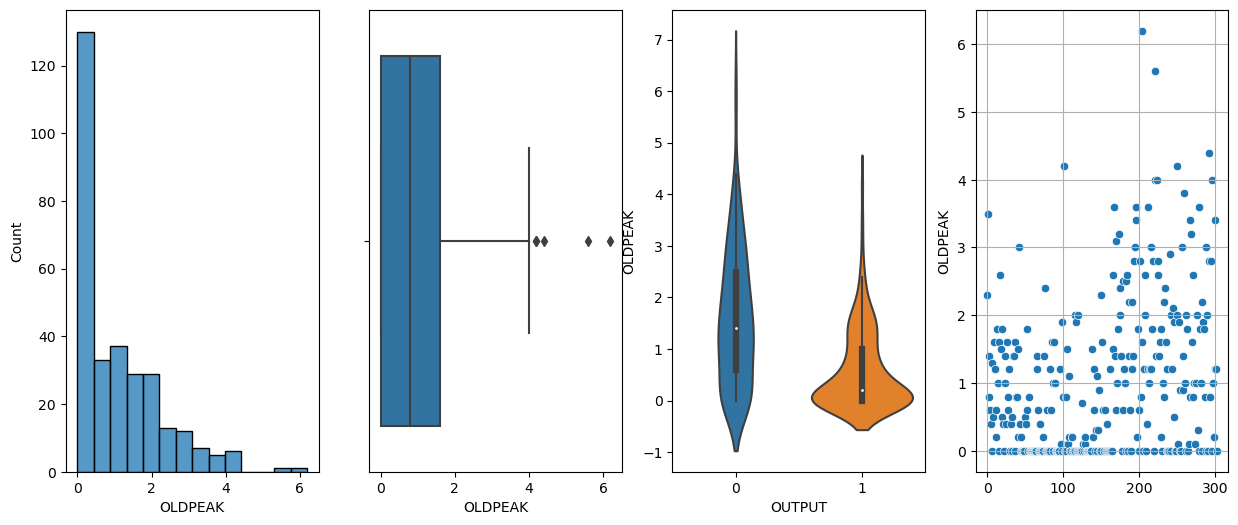

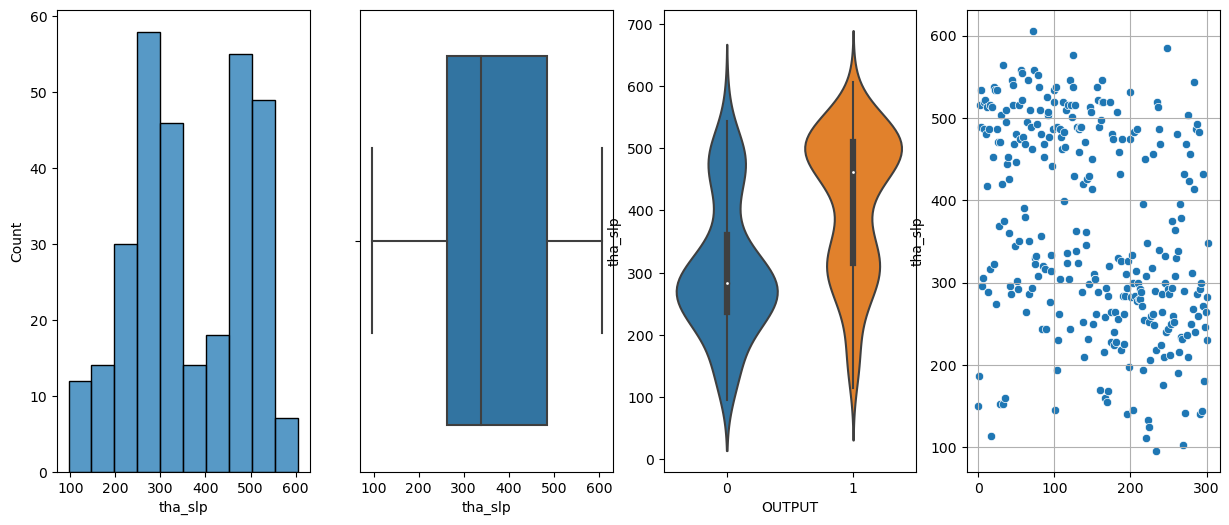

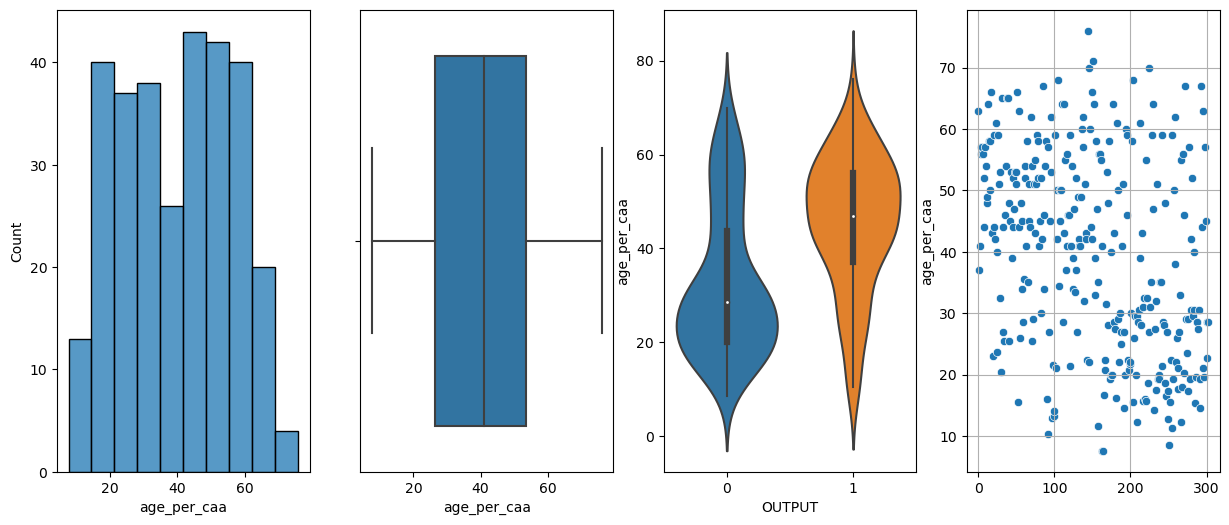

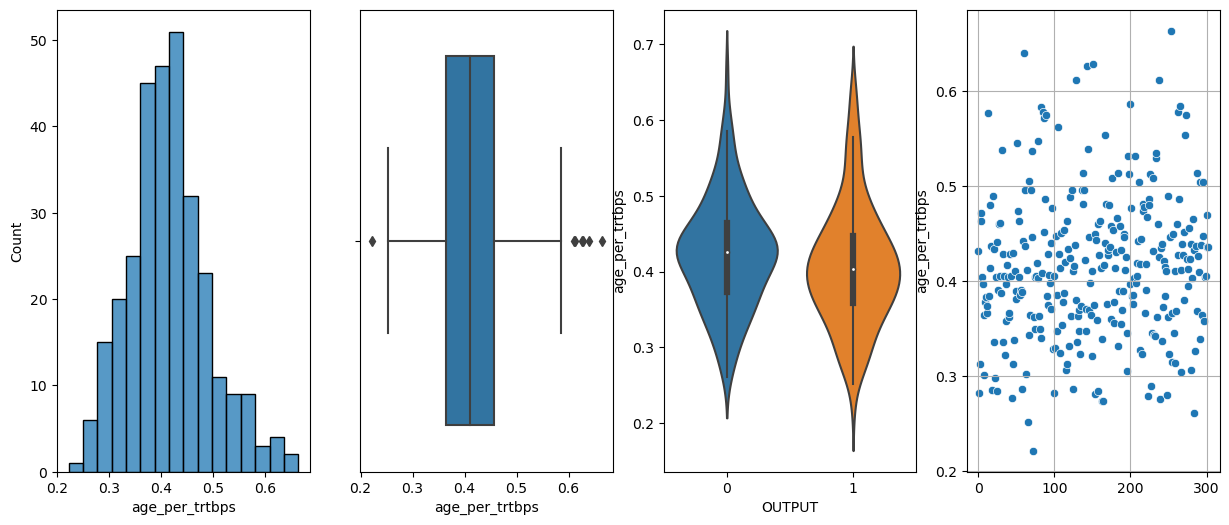

In [84]:
visualize_columns(f_df,target='OUTPUT')

In [85]:
#Outlier Removal

In [86]:
f_df[f_df['OLDPEAK']>4.7].index

Index([204, 221], dtype='int64')

In [87]:
f_df.drop(index=f_df[f_df['OLDPEAK']>4].index,inplace=True)

In [88]:
f_df.drop(index=f_df[f_df['THALACHH']<78].index,inplace=True)

In [89]:
pout = f_df[f_df['CHOL']>420].index

In [90]:
f_df.drop(index=pout,inplace=True)

In [91]:
f_df.drop(index=f_df[f_df['TRTBPS']>185].index,inplace=True)

In [92]:
outliers=f_df[(f_df['age_per_trtbps']>0.66)|(f_df['age_per_trtbps']<0.26)].index

In [93]:
f_df.drop(index=outliers,inplace=True)

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

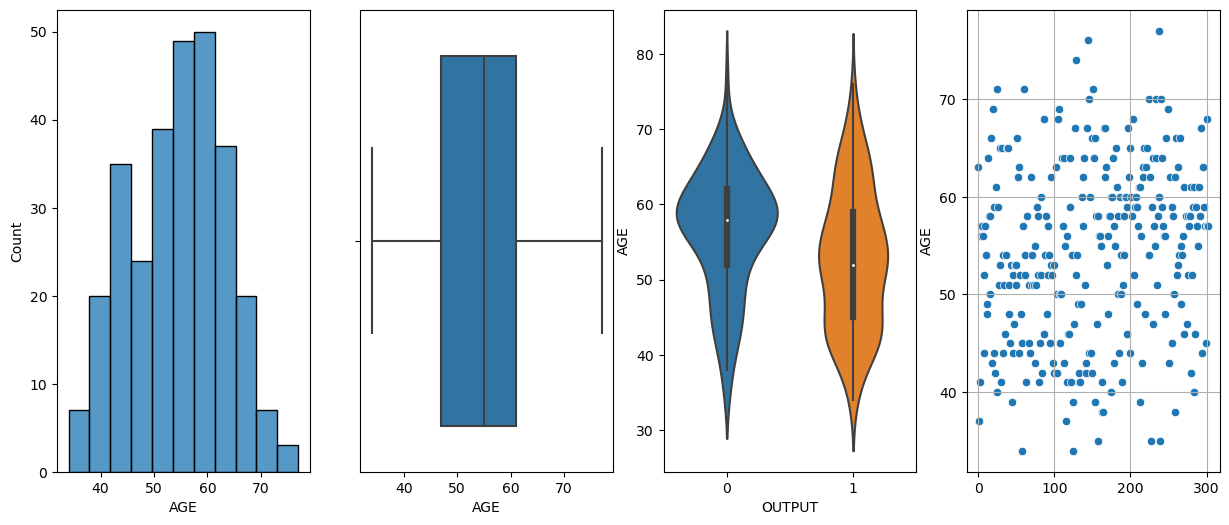

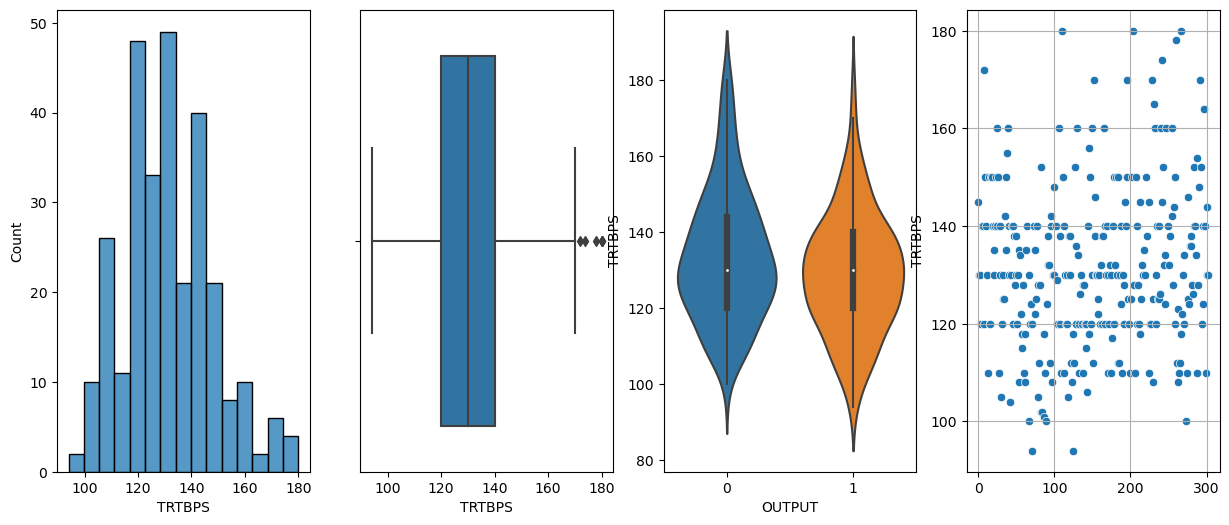

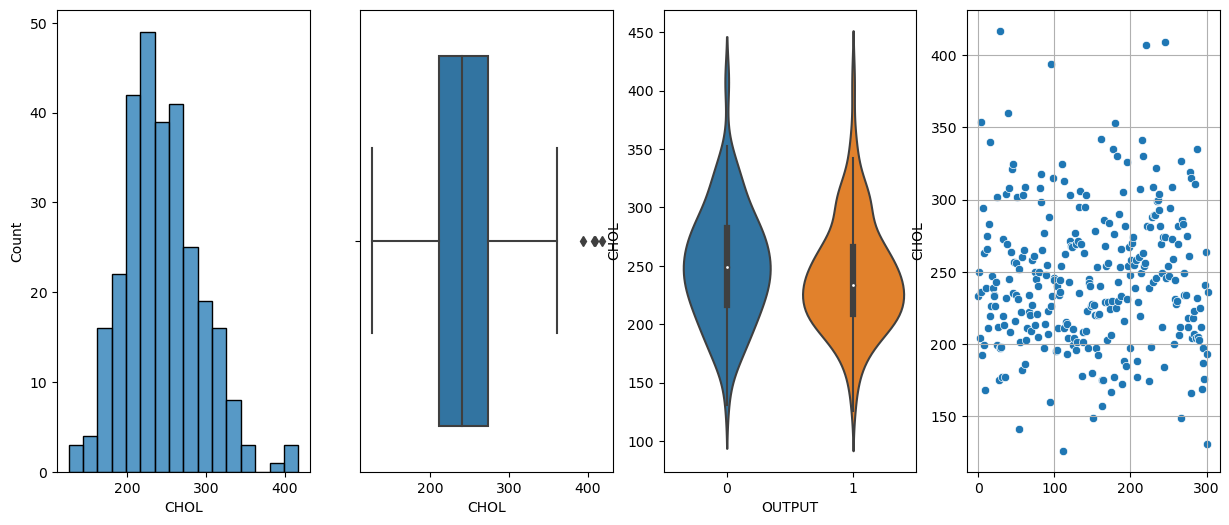

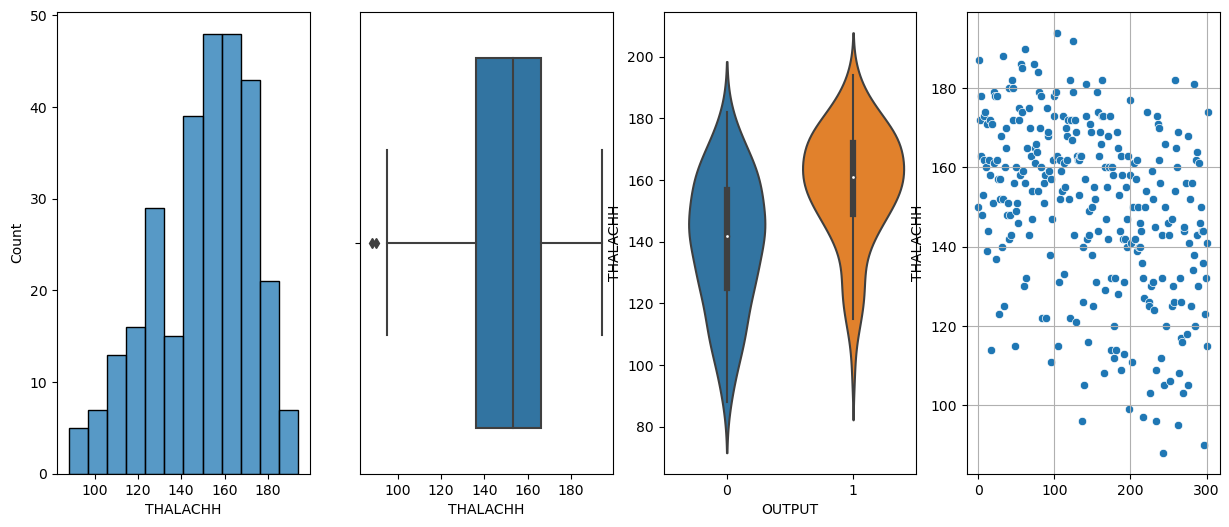

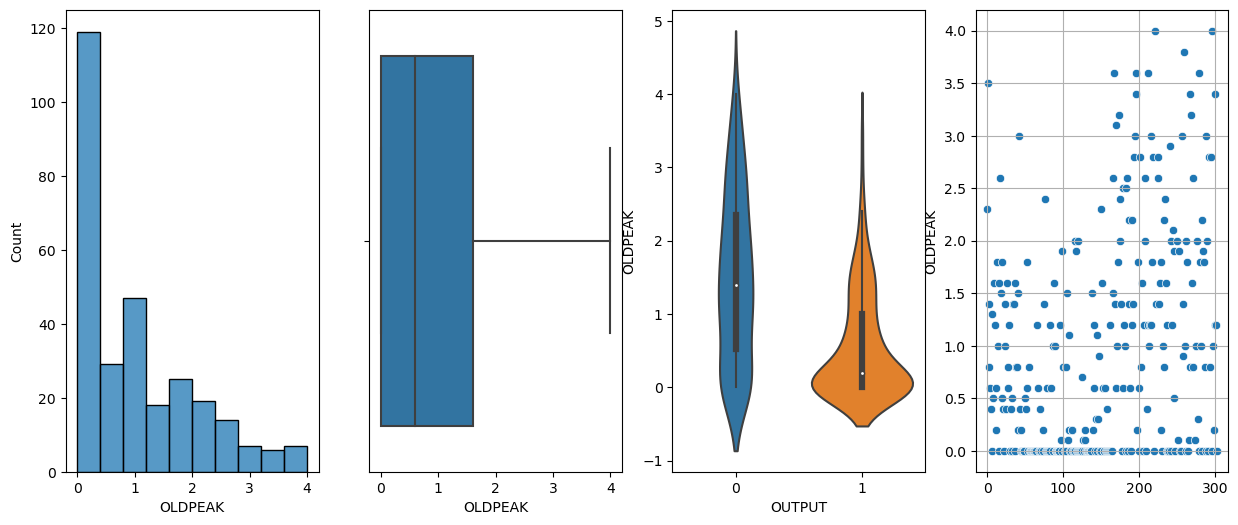

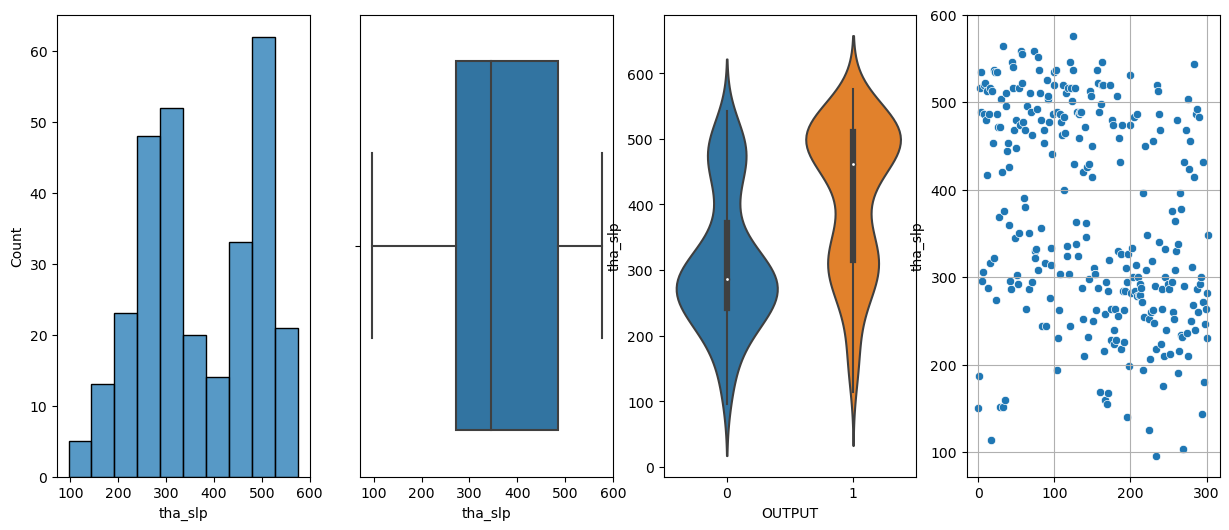

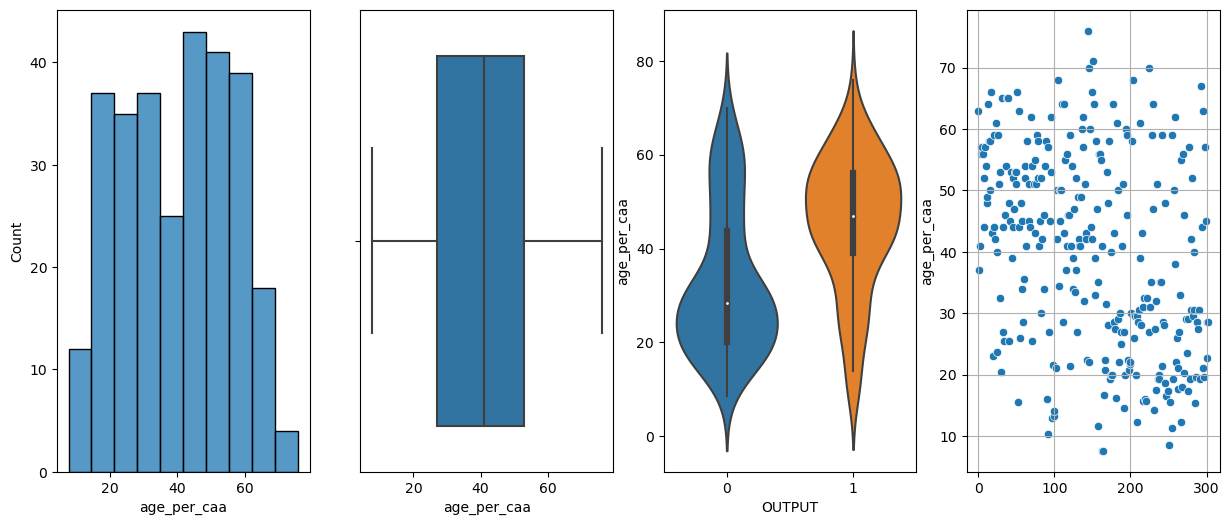

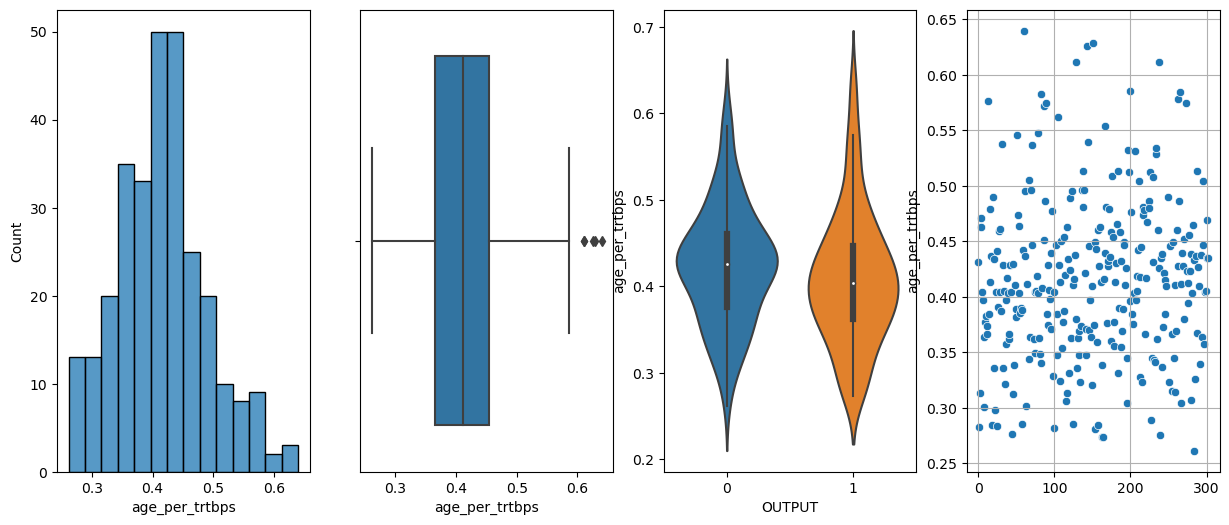

In [94]:
visualize_columns(f_df,target='OUTPUT')

In [95]:
f_df

,AGE,SEX,CP,TRTBPS,CHOL,FBS,RESTECG,THALACHH,EXNG,OLDPEAK,SLP,CAA,THALL,OUTPUT,tha_slp,age_per_caa,age_per_trtbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,150,63.000000,0.431507
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,187,37.000000,0.282443
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,516,41.000000,0.312977
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,534,56.000000,0.462810
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,489,57.000000,0.471074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,246,57.000000,0.404255
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,264,45.000000,0.405405
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,282,22.666667,0.468966
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,230,28.500000,0.435115


In [96]:
# feature transformation

In [97]:
from sklearn.base import BaseEstimator,check_array,check_is_fitted,TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,power_transform

In [99]:
f_df['THALACHH'].describe()

count    291.000000
mean     149.869416
std       22.206945
min       88.000000
25%      136.000000
50%      153.000000
75%      166.000000
max      194.000000
Name: THALACHH, dtype: float64

<Axes: ylabel='Frequency'>

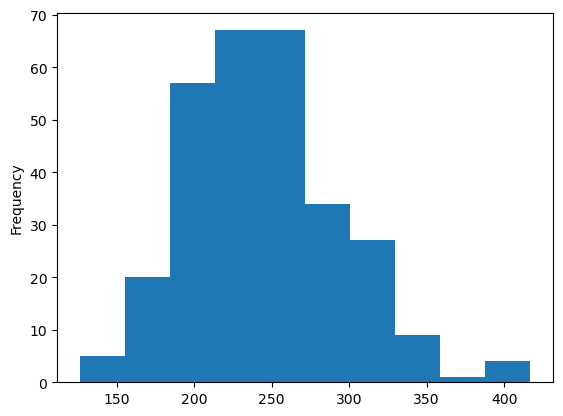

In [100]:
f_df['CHOL'].plot.hist()

In [101]:
sc = StandardScaler()


In [136]:
def transform_test(X,func=np.log,inverse_func=np.exp):
    X = X.to_numpy().reshape(-1,1)
    ft = FunctionTransformer(func=func,inverse_func=inverse_func)
    f_df["chol_trf"] = ft.fit_transform(X)
    f_df["chol_trf"].plot.hist(bins=20)
    plt.show()
    sns.histplot(f_df["chol_trf"],kde=True)

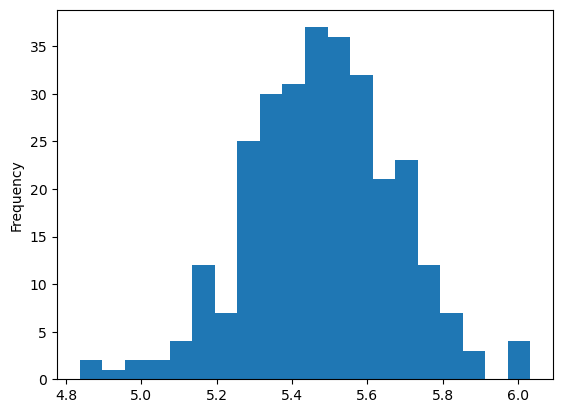

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


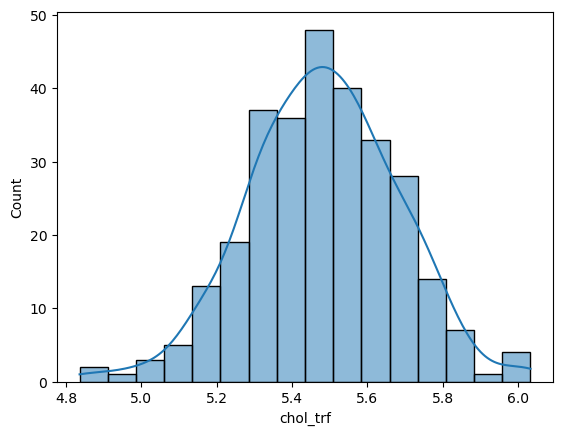

In [137]:
#ok we can use this transformation for CHOl ,np.log
transform_test(f_df['CHOL'])

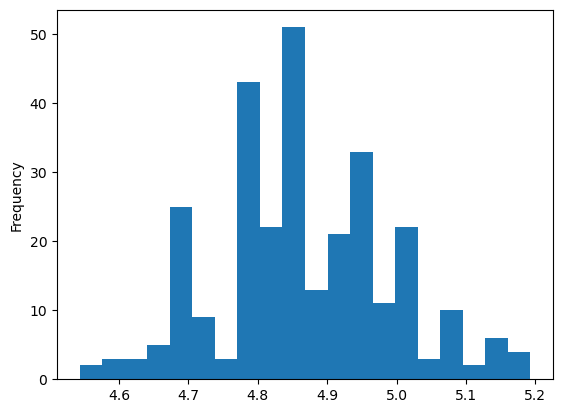

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


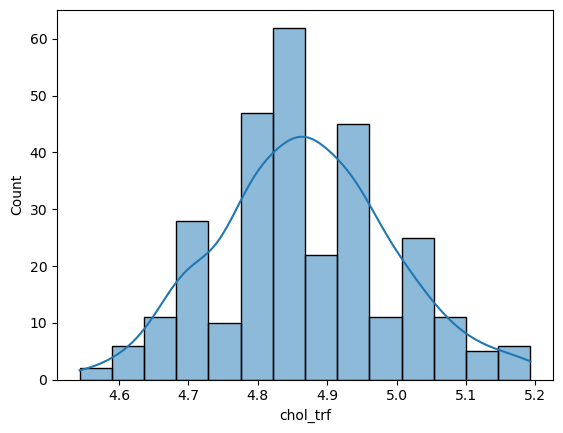

In [138]:
transform_test(f_df['TRTBPS'])

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:192: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


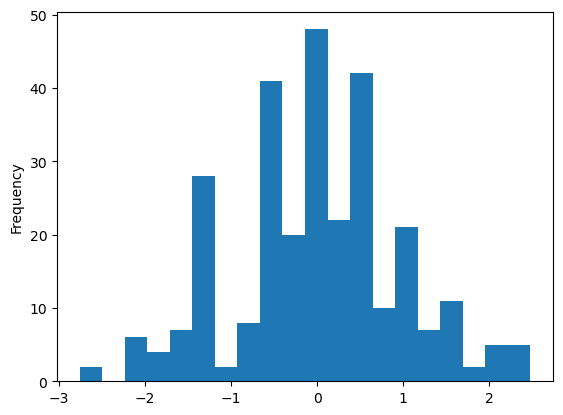

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


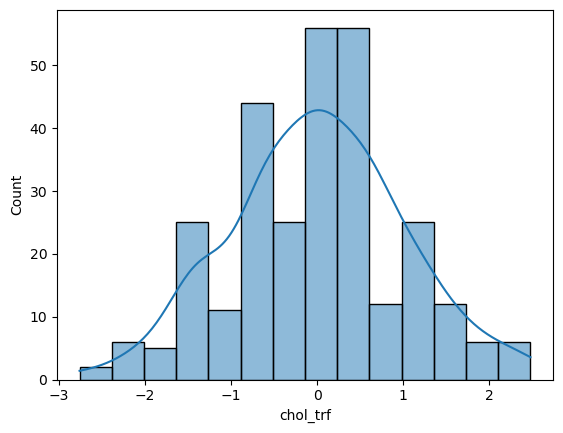

In [139]:
# trtb = powerransformer
transform_test(f_df['TRTBPS'],func=power_transform)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:192: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


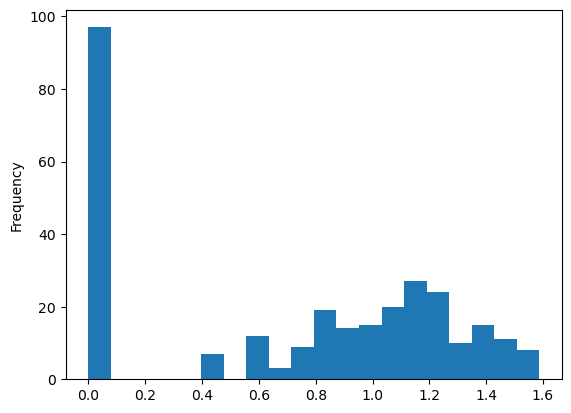

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


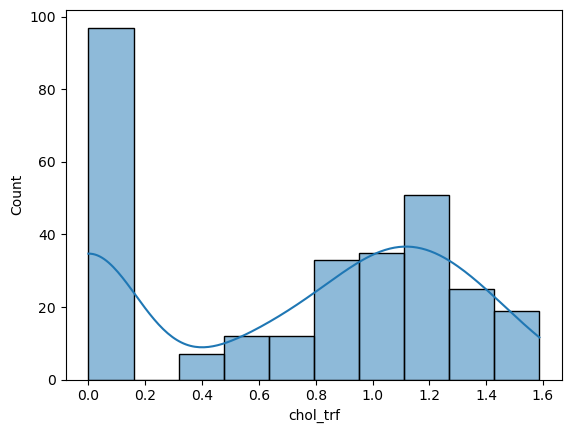

In [140]:
#OLD peak np.cbrt
transform_test(f_df['OLDPEAK'],func=np.cbrt)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:192: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


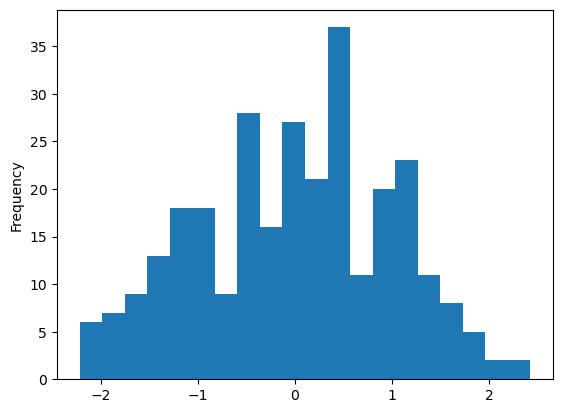

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


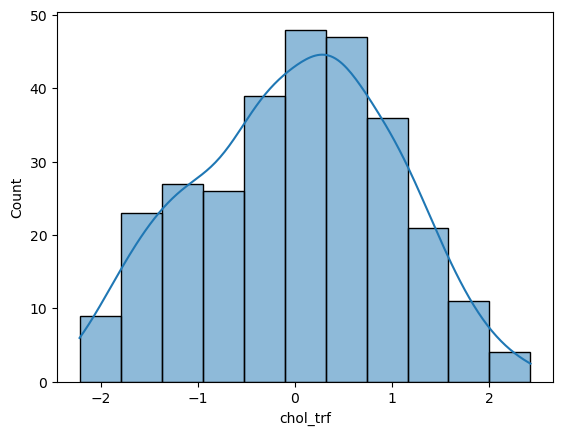

In [141]:
# Thallach power transformer
transform_test(f_df['THALACHH'],func=power_transform)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:192: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


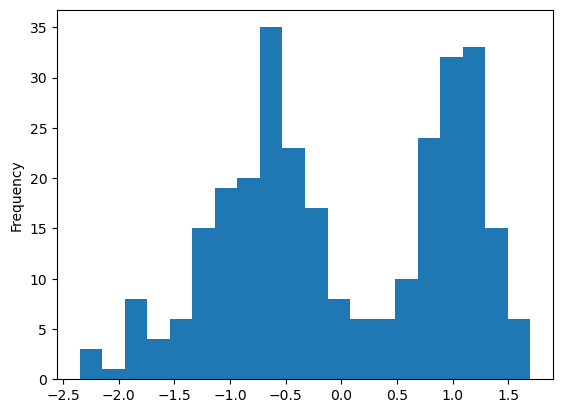

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


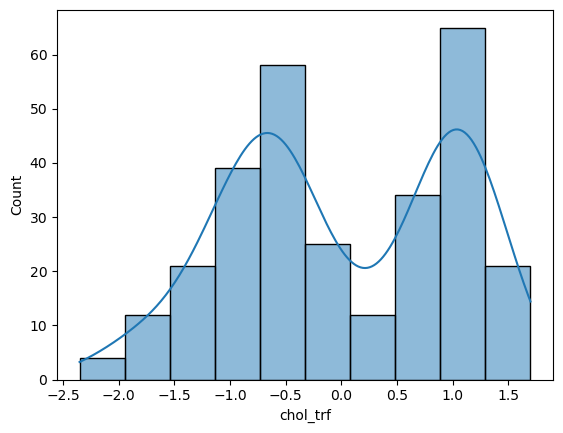

In [142]:
#tha_slp = powerTransformwe
transform_test(f_df[['tha_slp']],func=power_transform)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:192: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


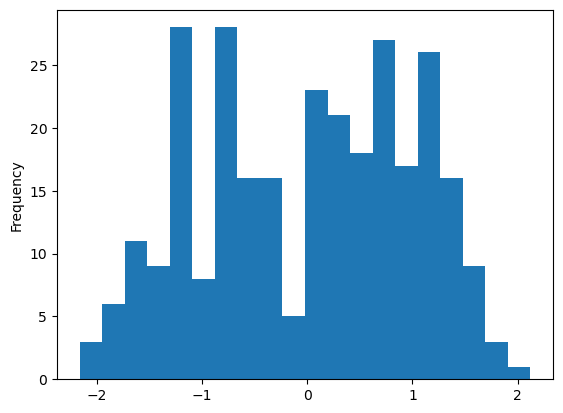

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


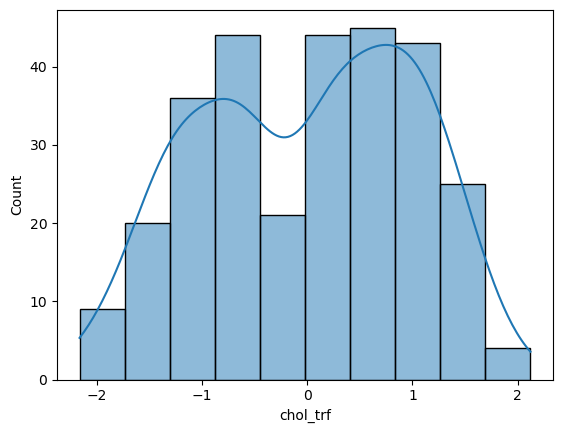

In [151]:
transform_test(f_df['age_per_caa'],func=power_transform)

In [146]:
#transform_test(f_df['age_per_trtbps'],func=np.cbrt)

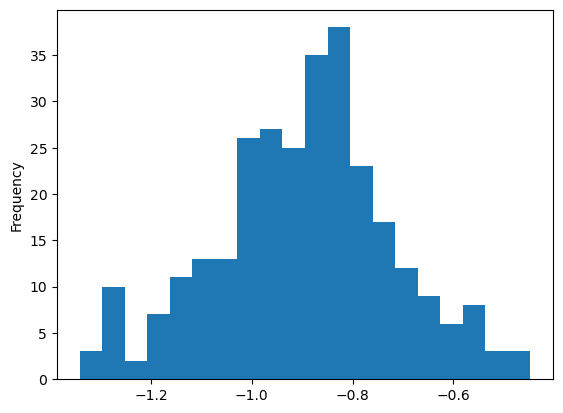

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


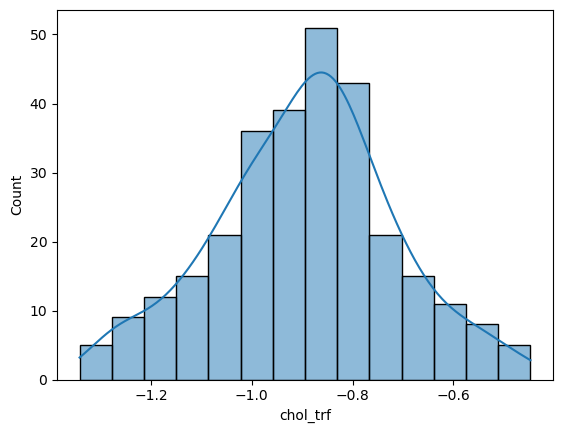

In [145]:
transform_test(f_df['age_per_trtbps'])

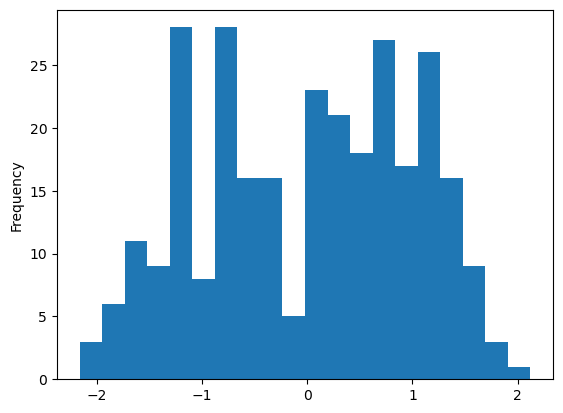

C:\Users\VICTUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


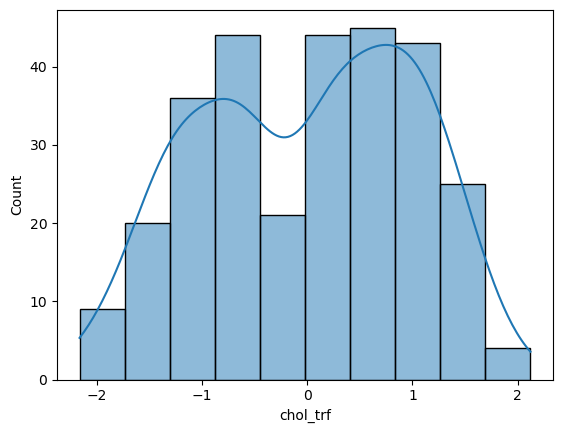

In [153]:
transform_test(f_df['chol_trf'])

In [120]:
 mask = np.tril(np.ones_like(df.corr()))

In [121]:
mask = np.triu(np.ones_like(df.corr()))

<Axes: >

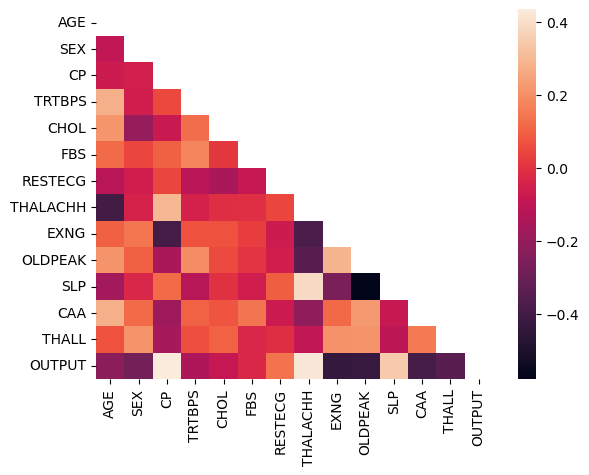

In [122]:
sns.heatmap(df.corr(),mask=mask)

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [228]:
svm = SVC(probability=True)

In [184]:
X = f_df.drop(columns="OUTPUT")
y = f_df['OUTPUT']

In [192]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: OUTPUT, Length: 291, dtype: int64

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [197]:
X_train.drop(columns=['chol_trf'],inplace=True)


In [199]:
y_train

215    0
226    0
222    0
75     1
25     1
      ..
192    0
73     1
110    1
281    0
106    1
Name: OUTPUT, Length: 232, dtype: int64

In [198]:
list(enumerate(X_train.columns))

[(0, 'AGE'),
 (1, 'SEX'),
 (2, 'CP'),
 (3, 'TRTBPS'),
 (4, 'CHOL'),
 (5, 'FBS'),
 (6, 'RESTECG'),
 (7, 'THALACHH'),
 (8, 'EXNG'),
 (9, 'OLDPEAK'),
 (10, 'SLP'),
 (11, 'CAA'),
 (12, 'THALL'),
 (13, 'tha_slp'),
 (14, 'age_per_caa'),
 (15, 'age_per_trtbps')]

In [200]:
trf = ColumnTransformer([
    ("trf2",FunctionTransformer(func=np.log,inverse_func=np.exp),[4,15]),
    ('trf3',PowerTransformer(),[3,7,13,14],),
    ('trf4',FunctionTransformer(func=np.cbrt,check_inverse=False),[9]),
    ("trf1",StandardScaler(),[0]),
],remainder="passthrough")

In [243]:
pipe_svc = Pipeline([
    ('p1',trf),
    ('p2',svm)
])

In [202]:
y_train

215    0
226    0
222    0
75     1
25     1
      ..
192    0
73     1
110    1
281    0
106    1
Name: OUTPUT, Length: 232, dtype: int64

In [231]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('p1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf2',
                                                  FunctionTransformer(func=<ufunc 'log'>,
                                                                      inverse_func=<ufunc 'exp'>),
                                                  [4, 15]),
                                                 ('trf3', PowerTransformer(),
                                                  [3, 7, 13, 14]),
                                                 ('trf4',
                                                  FunctionTransformer(check_inverse=False,
                                                                      func=<ufunc 'cbrt'>),
                                                  [9]),
                                                 ('trf1', StandardScaler(),
                                                  [0])])),
                ('p2', SVC(probability=True))])

In [250]:
y_pred = pipe_svc.predict(X_test)
y_proba = pipe_svc.predict_proba(X_test)
y_dec = pipe.decision_function(X_test)

In [251]:
y_dec

array([ 0.91807454, -1.20513586,  1.50832735, -1.72981965,  2.17835025,
       -0.07145624, -1.36731568,  1.46334688,  1.75529652,  0.30882509,
        0.87102407, -1.98473568, -0.21214563, -0.212246  ,  0.2687901 ,
        0.56736106,  1.63138315,  0.54842925, -1.17188694, -0.06125143,
        1.50734695, -1.2734327 , -1.22693495,  0.95397173,  1.07756334,
       -1.77541947, -1.31305111,  0.45531431,  0.82787739, -1.12537787,
       -0.0951712 ,  1.13285566, -1.46959014,  1.26524462,  0.22250611,
       -0.9648224 , -0.92656982,  1.01032203,  0.94038408,  0.40527049,
        0.66031215,  1.14899186, -1.56270708,  1.45405986, -0.1977064 ,
        0.93948301,  0.96629943,  1.21725026,  0.96362787,  1.95757821,
       -1.56224856,  1.15282777,  0.41349463, -0.83856718, -1.53885697,
       -1.48518991, -1.88593135,  0.85228291,  0.7700587 ])

In [233]:
from sklearn.metrics import accuracy_score,average_precision_score,confusion_matrix,f1_score,precision_score,recall_score,ConfusionMatrixDisplay

In [234]:
def scores(y_pred,y_test):
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("F1 Score : ",f1_score(y_test,y_pred))
    print("CM : ",confusion_matrix(y_test,y_pred))
    print("precision Score : ",precision_score(y_test,y_pred))
    print("Recall Score : ",recall_score(y_test,y_pred))

In [235]:
y_test.values

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [236]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [237]:
X_test.shape

(59, 17)

In [217]:
y_test.shape

(59,)

In [221]:
scores(y_pred,y_test)

Accuracy Score :  0.8983050847457628
F1 Score :  0.9117647058823529
CM :  [[22  3]
 [ 3 31]]
precision Score :  0.9117647058823529
Recall Score :  0.9117647058823529


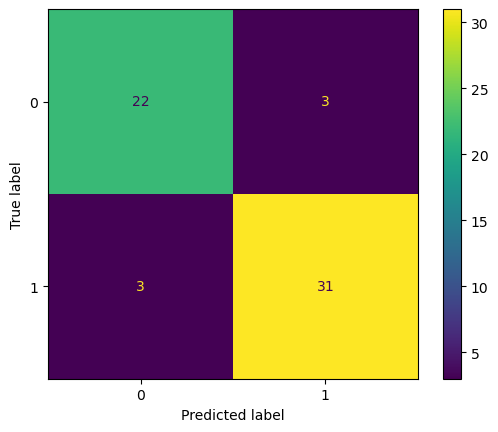

In [238]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [260]:
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score,PrecisionRecallDisplay,RocCurveDisplay

In [253]:
prec,recall,y_dec= precision_recall_curve(probas_pred=y_dec,y_true=y_test)

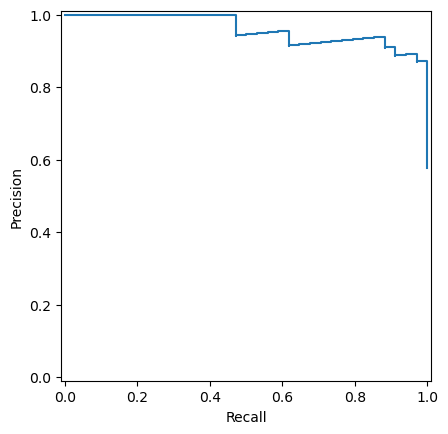

In [256]:
PrecisionRecallDisplay(prec,recall).plot()